Dataset : https://www.kaggle.com/datasets/gpiosenka/100-bird-species

In [8]:
# tensorflow & tensorflow-gpu will be use for deep learning part
# opencv-python will be use for data preprocessing
# matplotlib will be use for data visualization

!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# check for installed library

!pip list


  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439795 sha256=1a1446b3972a349ed4ae122c10686798cbe2b630c9371299557c61b2d33e3909
  Stored in directory: c:\users\x\appdata\local\pip\cache\wheels\05\94\dc\81042da9bced43ff430bc02043d213d9e4b210b584c39e31c1
Successfully built jax
Package                           Version
--------------------------------- --------------------
absl-py                           1.4.0
aiohttp                           3.8.1
aiosignal                         1.2.0
alabaster                         0.7.12
anaconda-client                   1.9.0
anaconda-navigator                2.1.4
anaconda-project                  0.10.2
anyio                             3.5.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.2
astroid                           2.6.6
astropy                           5.0.4
asttokens                         2.0.5
astu

In [1]:
# os is use for file navigation
import tensorflow as tf
import os

from pathlib import Path
import os.path
import random
import pandas as pd

# Import Data Science Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Visualization Libraries
import matplotlib.cm as cm
import cv2
import seaborn as sns

import PIL

In [24]:
pip install Keras-Preprocessing

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)


In [2]:
# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator

In [3]:
# Setting GPU memory consumption growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) 

# EXPLORATORY DATA ANALYSIS

In [4]:
import os 

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 80 directories and 0 images in train
There are 0 directories and 163 images in train\ABBOTTS BABBLER
There are 0 directories and 180 images in train\ABBOTTS BOOBY
There are 0 directories and 179 images in train\ABYSSINIAN GROUND HORNBILL
There are 0 directories and 135 images in train\AFRICAN CROWNED CRANE
There are 0 directories and 154 images in train\AFRICAN EMERALD CUCKOO
There are 0 directories and 150 images in train\BAIKAL TEAL
There are 0 directories and 160 images in train\BALD EAGLE
There are 0 directories and 152 images in train\BALD IBIS
There are 0 directories and 132 images in train\BALI STARLING
There are 0 directories and 137 images in train\BALTIMORE ORIOLE
There are 0 directories and 155 images in train\CAATINGA CACHOLOTE
There are 0 directories and 177 images in train\CABOTS TRAGOPAN
There are 0 directories and 162 images in train\CACTUS WREN
There are 0 directories and 152 images in train\CALIFORNIA CONDOR
There are 0 directories and 160 images in train\CA

In [5]:
# number of total pictures in th dataset
root_folder = "train"
total_files = 0

for foldername, subfolders, filenames in os.walk(root_folder):
    num_files = len(filenames)
    total_files += num_files

In [6]:
# number of total labels
num_of_bird_groups = len(os.listdir("train"))
classes = os.listdir("train")

In [7]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("train")
# creating a list of class names from subdirectory 
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 

In [8]:
# data exploration
print(f'Number of pictures in the dataset: {total_files}')
print(f'Number of different labels       : {num_of_bird_groups}\n')
print(f'Labels: {class_names}')

Number of pictures in the dataset: 12687
Number of different labels       : 80

Labels: ['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'BAIKAL TEAL'
 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING' 'BALTIMORE ORIOLE'
 'CAATINGA CACHOLOTE' 'CABOTS TRAGOPAN' 'CACTUS WREN' 'CALIFORNIA CONDOR'
 'CALIFORNIA GULL' 'D-ARNAUDS BARBET' 'DALMATIAN PELICAN'
 'DARJEELING WOODPECKER' 'DARK EYED JUNCO' 'DAURIAN REDSTART'
 'EASTERN BLUEBIRD' 'EASTERN BLUEBONNET' 'EASTERN GOLDEN WEAVER'
 'EASTERN MEADOWLARK' 'EASTERN ROSELLA' 'FAIRY BLUEBIRD' 'FAIRY PENGUIN'
 'FAIRY TERN' 'FAN TAILED WIDOW' 'FASCIATED WREN' 'GAMBELS QUAIL'
 'GANG GANG COCKATOO' 'GILA WOODPECKER' 'GILDED FLICKER' 'GLOSSY IBIS'
 'HAMERKOP' 'HARLEQUIN DUCK' 'HARLEQUIN QUAIL' 'HARPY EAGLE'
 'HAWAIIAN GOOSE' 'INDIAN BUSTARD' 'INDIAN PITTA' 'INDIAN ROLLER'
 'INDIAN VULTURE' 'INDIGO BUNTING' 'JABIRU' 'JACK SNIPE' 'JACOBIN PIGEON'
 'JANDAYA PARAKEET' 'JAPANESE ROBIN' 'KAKAPO' 'KILLDE

ABBOTTS BABBLER: 163
ABBOTTS BOOBY: 180
ABYSSINIAN GROUND HORNBILL: 179
AFRICAN CROWNED CRANE: 135
AFRICAN EMERALD CUCKOO: 154
BAIKAL TEAL: 150
BALD EAGLE: 160
BALD IBIS: 152
BALI STARLING: 132
BALTIMORE ORIOLE: 137
CAATINGA CACHOLOTE: 155
CABOTS TRAGOPAN: 177
CACTUS WREN: 162
CALIFORNIA CONDOR: 152
CALIFORNIA GULL: 160
D-ARNAUDS BARBET: 233
DALMATIAN PELICAN: 159
DARJEELING WOODPECKER: 136
DARK EYED JUNCO: 203
DAURIAN REDSTART: 146
EASTERN BLUEBIRD: 154
EASTERN BLUEBONNET: 134
EASTERN GOLDEN WEAVER: 152
EASTERN MEADOWLARK: 190
EASTERN ROSELLA: 160
FAIRY BLUEBIRD: 160
FAIRY PENGUIN: 154
FAIRY TERN: 136
FAN TAILED WIDOW: 150
FASCIATED WREN: 150
GAMBELS QUAIL: 153
GANG GANG COCKATOO: 142
GILA WOODPECKER: 155
GILDED FLICKER: 138
GLOSSY IBIS: 175
HAMERKOP: 163
HARLEQUIN DUCK: 151
HARLEQUIN QUAIL: 134
HARPY EAGLE: 175
HAWAIIAN GOOSE: 160
INDIAN BUSTARD: 131
INDIAN PITTA: 186
INDIAN ROLLER: 183
INDIAN VULTURE: 150
INDIGO BUNTING: 153
JABIRU: 143
JACK SNIPE: 159
JACOBIN PIGEON: 204
JANDAYA PA

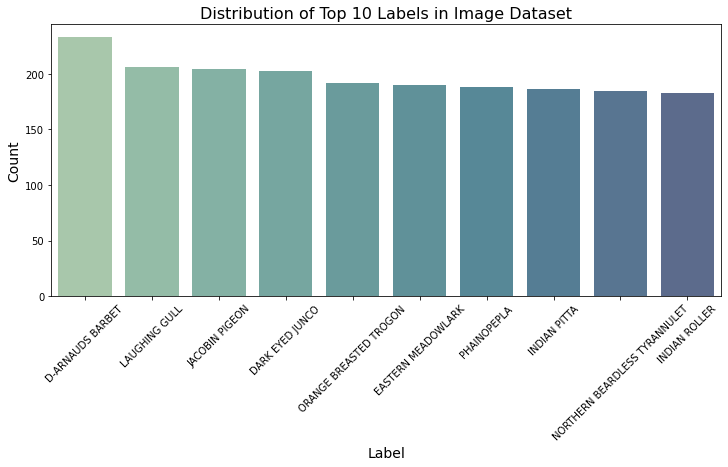

In [9]:
import os

# Count total labels of classes
def count_labels(target_dir):
    labels = os.listdir(target_dir)

    label_counts = {}

    for label in labels:
        label_folder = target_dir + label
        label_count = len(os.listdir(label_folder))
        label_counts[label] = label_count
        print(f"{label}: {label_count}")
        
    return label_counts

label_counts = count_labels(target_dir = "train/")

# Sort the dictionary by value in descending order
sorted_label_counts = dict(sorted(label_counts.items(), key=lambda item: item[1], reverse=True))

# Get the top 10 labels
top_10_labels = dict(list(sorted_label_counts.items())[:10])

plt.figure(figsize=(12, 5))
# Create a bar chart
sns.barplot(x=list(top_10_labels.keys()), y=list(top_10_labels.values()), alpha=0.8, palette='crest')

# Add labels and title
plt.title('Distribution of Top 10 Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45) 

# Show the plot
plt.show()

# DATA VISUALIZATION

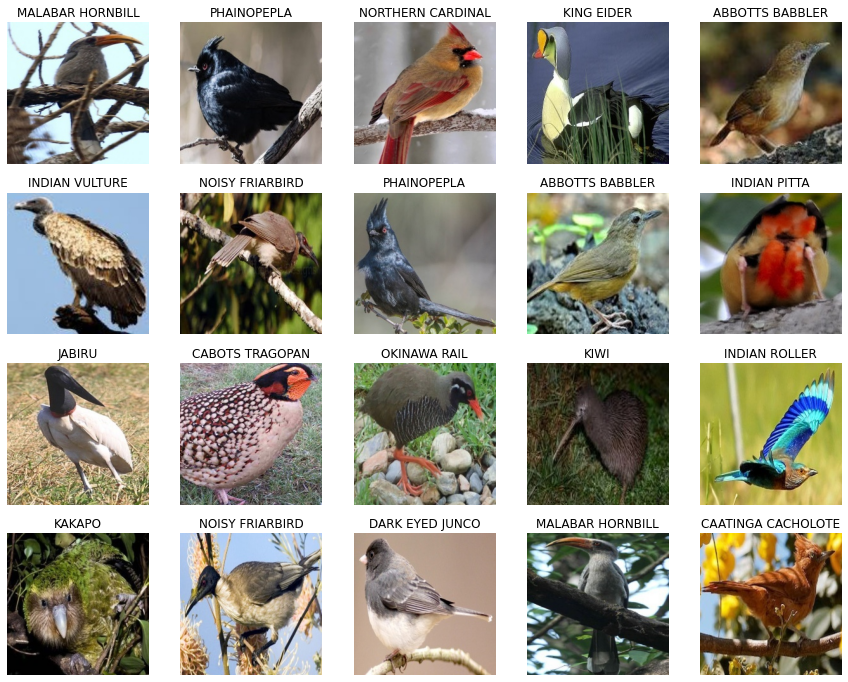

In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_images(base_dir, n_rows, n_cols, figsize):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i in range(n_rows):
        for j in range(n_cols):
            # get a random image path
            random_class = random.choice(os.listdir(base_dir))
            random_image = random.choice(os.listdir(os.path.join(base_dir, random_class)))

            # read image and plot it
            img = mpimg.imread(os.path.join(base_dir, random_class, random_image))
            axs[i][j].imshow(img)
            axs[i][j].axis("off")
            axs[i][j].set_title(random_class)

    plt.show()

# set up the base directory
base_dir = "train/"

# call the function to display a 4 x 4 grid of random images
view_random_images(base_dir, n_rows=4, n_cols=5, figsize=(15,12))

# DATA PREPROCESSING

In [11]:
#Load training, testing and validation data
train_dir = 'train/'
val_dir = 'valid/'
test_dir = 'test/'

In [12]:
batch_size = 32
img_size = 224

In [13]:
# Training data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255., # rescales the pixel values of the input images to be between 0 and 1
                                   rotation_range = 15, #randomly rotates the image by up to 15 degrees
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True, #randomly flips the image horizontally
                                   vertical_flip = True, #randomly flips the image vertically
                                   zoom_range=0.3) #randomly zooms into the image by up to 30%

test_datagen = ImageDataGenerator(rescale = 1./255.) # rescales the pixel values of the input images to be between 0 and 1

valid_datagen = ImageDataGenerator(rescale = 1./255.) # rescales the pixel values of the input images to be between 0 and 1
                                   

In [14]:
# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(train_dir,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

valid_data = valid_datagen.flow_from_directory(val_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

labels = [k for k in train_data.class_indices]

Found 12687 images belonging to 80 classes.
Found 400 images belonging to 80 classes.
Found 400 images belonging to 80 classes.


# DATA MODELING

# PART A : SHORTLIST MODELS

# InceptionV3

In [42]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Experiment 1 : ACTIVATION (SOFTMAX), OPTIMIZER (ADAM)

In [44]:
import datetime
start = datetime.datetime.now()

# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#4. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

#5. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#6. Create the output activation layer
outputs1 = tf.keras.layers.Dense(num_of_bird_groups, activation = "softmax", name = "output-layer")(x)

#7. Combine the inputs with outputs into a model
model_incv3_SA = tf.keras.Model(inputs, outputs1)

#8. Compile the model
model_incv3_SA.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

#9. Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#10. Fit the model
history1_incv3 = model_incv3_SA.fit(train_data,
                      epochs=10,
                      validation_data = val_data,
                      callbacks=[early_stopping]
                      )

end = datetime.datetime.now()
elapsed_incv3 = end - start
print ('InceptionResNetV3 training complete. Elapsed: ', elapsed_incv3)

Shape after passing inputs through base model: (None, 5, 5, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/10
397/397 [==============================] - 254s 632ms/step - loss: 1.7949 - accuracy: 0.5504 - val_loss: 0.5797 - val_accuracy: 0.8200
Epoch 2/10
397/397 [==============================] - 255s 642ms/step - loss: 0.9918 - accuracy: 0.7244 - val_loss: 0.4178 - val_accuracy: 0.8900
Epoch 3/10
397/397 [==============================] - 250s 629ms/step - loss: 0.8141 - accuracy: 0.7687 - val_loss: 0.3514 - val_accuracy: 0.8875
Epoch 4/10
397/397 [==============================] - 249s 627ms/step - loss: 0.7524 - accuracy: 0.7873 - val_loss: 0.3414 - val_accuracy: 0.9050
Epoch 5/10
397/397 [==============================] - 247s 621ms/step - loss: 0.6973 - accuracy: 0.7950 - val_loss: 0.3443 - val_accuracy: 0.9025
Epoch 6/10
397/397 [==============================] - 247s 623ms/step - loss: 0.6838 - accuracy: 0.8046 - val_loss: 0.2573 - val_accuracy: 0.9250
Epoch 7/1

In [55]:
from sklearn.metrics import classification_report
# Evaluate
loss, accuracy = model_incv3_SA.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history1_incv3.history)
e_exe = hist_nda.shape[0]

print("\n        InceptionV3 (Experiment 1)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))
print("           Elapsed:",elapsed_incv3)

13/13 [==============================] - 6s 454ms/step - loss: 0.2287 - accuracy: 0.9225

        InceptionV3 (Experiment 1)

  Epochs completed:  9
              Loss: 0.2287
          Accuracy: 92.2500 % 
           Elapsed: 0:37:29.803483


In [51]:
model_incv3_SA.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 80)                163920    
                                                                 
Total params: 21,966,704
Trainable params: 163,920
Non-trainable params: 21,802,784
_________________________________________________________________


In [46]:
def plot_loss_curves(history):
  """
  Returns Separate Loss Curves For Training And Validation Metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plotting Loss
  plt.plot(epochs, loss, label='TRAINING_LOSS')
  plt.plot(epochs, val_loss, label='VAL_LOSS')
  plt.title('LOSS')
  plt.xlabel('EPOCHS')
  plt.legend()

  # Plotting Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='TRAINING_ACCURACY')
  plt.plot(epochs, val_accuracy, label='VAL_ACCURACY')
  plt.title('ACCURACY')
  plt.xlabel('EPOCHS')
  plt.legend()

In [47]:
print(history1_incv3.history)

{'loss': [1.7948768138885498, 0.9918435215950012, 0.8141414523124695, 0.7523522973060608, 0.6973073482513428, 0.6838415265083313, 0.6296936273574829, 0.5975909233093262, 0.6025346517562866], 'accuracy': [0.5504059195518494, 0.7244423627853394, 0.768739640712738, 0.7873413562774658, 0.7949870228767395, 0.8046031594276428, 0.8208402395248413, 0.8262788653373718, 0.8280129432678223], 'val_loss': [0.5797059535980225, 0.4178222715854645, 0.35141313076019287, 0.3413790762424469, 0.3443179428577423, 0.2573340833187103, 0.28098830580711365, 0.27517059445381165, 0.28322461247444153], 'val_accuracy': [0.8199999928474426, 0.8899999856948853, 0.887499988079071, 0.9049999713897705, 0.9024999737739563, 0.925000011920929, 0.9075000286102295, 0.9225000143051147, 0.9275000095367432]}


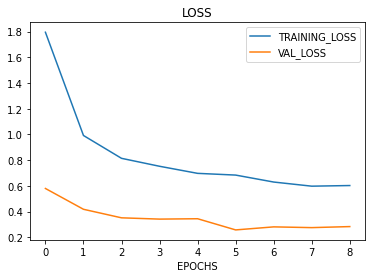

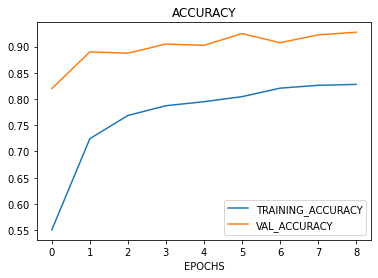

In [48]:
plot_loss_curves(history1_incv3)

# Experiment 2 : ACTIVATION (RELU), OPTIMIZER (SGD)


In [49]:
import datetime
start = datetime.datetime.now()

# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#4. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

#5. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#6. Create the output activation layer
outputs2 = tf.keras.layers.Dense(num_of_bird_groups, activation = "relu", name = "output-layer")(x)

#7. Combine the inputs with outputs into a model
model_incv3_RS = tf.keras.Model(inputs, outputs2)

#8. Compile the model
model_incv3_RS.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                metrics = ["accuracy"])

#9. Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#10. Fit the model
history2_incv3 = model_incv3_RS.fit(train_data,
                      epochs=10,
                      validation_data = val_data,
#                       steps_per_epoch=len(train_data),
#                       validation_steps=int(0.25*len(val_data)),
                      callbacks=[early_stopping]
                      )

end = datetime.datetime.now()
elapsed_incv3_1 = end - start
print ('InceptionResNetV3 training complete. Elapsed: ', elapsed_incv3_1)

Shape after passing inputs through base model: (None, 5, 5, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/10
397/397 [==============================] - 259s 644ms/step - loss: 5.7655 - accuracy: 0.0150 - val_loss: 4.7165 - val_accuracy: 0.0125
Epoch 2/10
397/397 [==============================] - 250s 629ms/step - loss: 4.5114 - accuracy: 0.0152 - val_loss: 4.2795 - val_accuracy: 0.0125
Epoch 3/10
397/397 [==============================] - 248s 625ms/step - loss: 4.2680 - accuracy: 0.0160 - val_loss: 4.0771 - val_accuracy: 0.0175
Epoch 4/10
397/397 [==============================] - 247s 622ms/step - loss: 4.1399 - accuracy: 0.0197 - val_loss: 3.9738 - val_accuracy: 0.0175
Epoch 5/10
397/397 [==============================] - 249s 626ms/step - loss: 4.0545 - accuracy: 0.0197 - val_loss: 3.8651 - val_accuracy: 0.0175
Epoch 6/10
397/397 [==============================] - 248s 624ms/step - loss: 3.9590 - accuracy: 0.0203 - val_loss: 3.7408 - val_accuracy: 0.0175
Epoch 7/1

In [56]:
# Evaluate
loss, accuracy = model_incv3_RS.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history2_incv3.history)
e_exe = hist_nda.shape[0]

print("\n        InceptionV3 (Experiment 2)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))
print("           Elapsed:",elapsed_incv3_1)

13/13 [==============================] - 6s 449ms/step - loss: 3.9017 - accuracy: 0.0125

        InceptionV3 (Experiment 2)

  Epochs completed:  10
              Loss: 3.9017
          Accuracy: 1.2500 % 
           Elapsed: 0:41:39.012058


In [52]:
model_incv3_RS.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 80)                163920    
                                                                 
Total params: 21,966,704
Trainable params: 163,920
Non-trainable params: 21,802,784
_________________________________________________________________


In [58]:
print(history2_incv3.history)

{'loss': [5.765489101409912, 4.511379718780518, 4.268021583557129, 4.139914035797119, 4.054506301879883, 3.959036350250244, 3.8583106994628906, 3.7066495418548584, 3.712963342666626, 4.154022693634033], 'accuracy': [0.014975959435105324, 0.015212422236800194, 0.01600063033401966, 0.019705209881067276, 0.019705209881067276, 0.02033577673137188, 0.020493417978286743, 0.024434460327029228, 0.012296050786972046, 0.011113738641142845], 'val_loss': [4.716535568237305, 4.2795090675354, 4.0770792961120605, 3.973830461502075, 3.865102529525757, 3.740776777267456, 3.590691328048706, 3.3420138359069824, 3.3243658542633057, 3.9004578590393066], 'val_accuracy': [0.012500000186264515, 0.012500000186264515, 0.017500000074505806, 0.017500000074505806, 0.017500000074505806, 0.017500000074505806, 0.02250000089406967, 0.02500000037252903, 0.012500000186264515, 0.012500000186264515]}


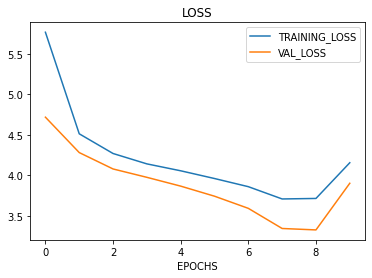

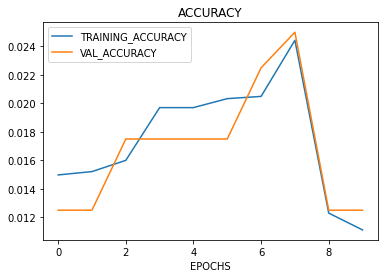

In [59]:
plot_loss_curves(history2_incv3)

# Experiment 3 : ACTIVATION (TANH), OPTIMIZER (RMSprop)


In [50]:
import datetime
start = datetime.datetime.now()

# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#4. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

#5. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#6. Create the output activation layer
outputs3 = tf.keras.layers.Dense(num_of_bird_groups, activation = "tanh", name = "output-layer")(x)

#7. Combine the inputs with outputs into a model
model_incv3_TR = tf.keras.Model(inputs, outputs3)

#8. Compile the model
model_incv3_TR.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
                metrics = ["accuracy"])

#9. Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#10. Fit the model
history3_incv3 = model_incv3_TR.fit(train_data,
                      epochs=10,
                      validation_data = val_data,
#                       steps_per_epoch=len(train_data),
#                       validation_steps=int(0.25*len(val_data)),
                      callbacks=[early_stopping]
                      )

end = datetime.datetime.now()
elapsed_incv3_2 = end - start
print ('InceptionResNetV3 training complete. Elapsed: ', elapsed_incv3_2)

Shape after passing inputs through base model: (None, 5, 5, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/10
397/397 [==============================] - 249s 619ms/step - loss: 9.1200 - accuracy: 0.0124 - val_loss: 9.9932 - val_accuracy: 0.0050
Epoch 2/10
397/397 [==============================] - 246s 619ms/step - loss: nan - accuracy: 0.0124 - val_loss: nan - val_accuracy: 0.0125
Epoch 3/10
397/397 [==============================] - 252s 634ms/step - loss: nan - accuracy: 0.0128 - val_loss: nan - val_accuracy: 0.0125
Epoch 4/10
397/397 [==============================] - 248s 625ms/step - loss: nan - accuracy: 0.0128 - val_loss: nan - val_accuracy: 0.0125
InceptionResNetV3 training complete. Elapsed:  0:16:37.537509


In [53]:
model_incv3_TR.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 80)                163920    
                                                                 
Total params: 21,966,704
Trainable params: 163,920
Non-trainable params: 21,802,784
_________________________________________________________________


In [57]:
# Evaluate
loss, accuracy = model_incv3_TR.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history3_incv3.history)
e_exe = hist_nda.shape[0]

print("\n        InceptionV3 (Experiment 3)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))
print("           Elapsed:",elapsed_incv3_2)

13/13 [==============================] - 6s 477ms/step - loss: nan - accuracy: 0.0125

        InceptionV3 (Experiment 3)

  Epochs completed:  4
              Loss: nan
          Accuracy: 1.2500 % 
           Elapsed: 0:16:37.537509


In [60]:
print(history3_incv3.history)

{'loss': [9.12004280090332, nan, nan, nan], 'accuracy': [0.012374872341752052, 0.012374872341752052, 0.012847797013819218, 0.012847797013819218], 'val_loss': [9.993220329284668, nan, nan, nan], 'val_accuracy': [0.004999999888241291, 0.012500000186264515, 0.012500000186264515, 0.012500000186264515]}


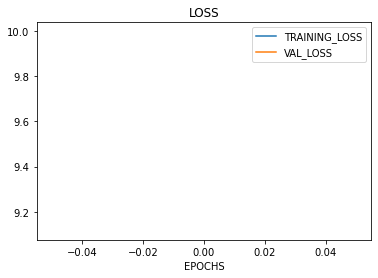

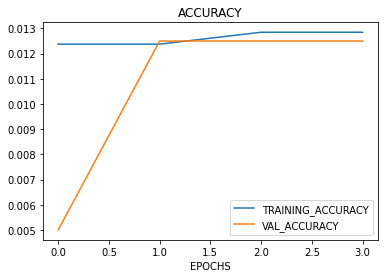

In [61]:
plot_loss_curves(history3_incv3)

# INCEPTIONV3 CONCLUSION

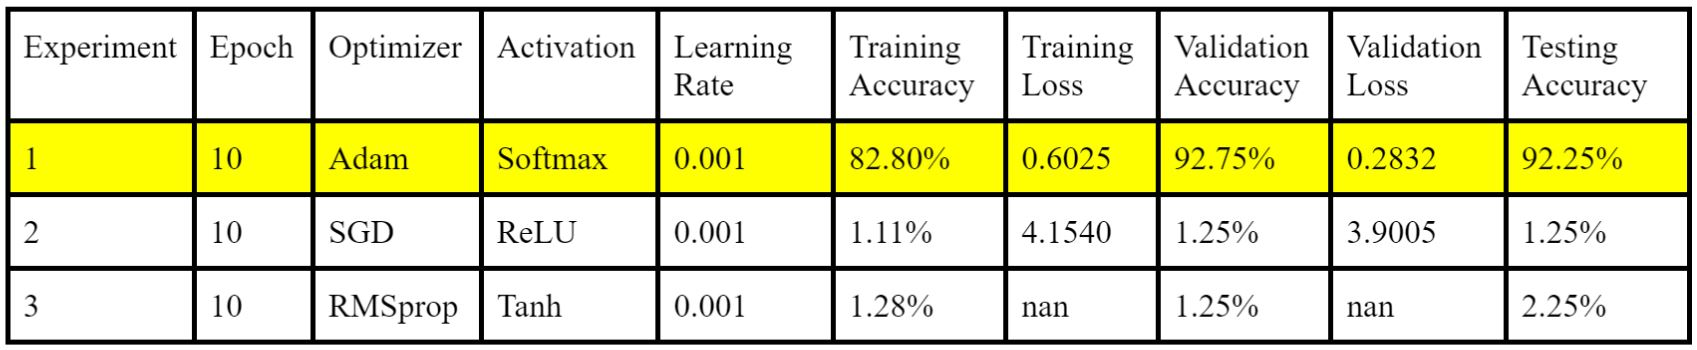

# VGG16

In [15]:
#For modeling and model viewing. 
import tensorflow as tf
#from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical #Image generator used for transformation to categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras import backend, models
#from sklearn.model_selection import train_test_split  #could have used on the consolidated file.
from sklearn.metrics import confusion_matrix

from tensorflow.keras.applications import VGG16
#from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input

# Experiment 1 : OPTIMIZER (ADAM)

In [16]:
base_vgg16 = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (224,224,3))

# Freeze the VGG16 weights.
base_vgg16.trainable = False 

In [17]:
#create new model
model = Sequential()

model.add(base_vgg16)
model.add(Flatten()) #1024#model.add(Dense(256)) 
model.add(Activation('relu'))
model.add(Dense(80)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 activation (Activation)     (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 80)                2007120   
                                                                 
 activation_1 (Activation)   (None, 80)                0         
                                                                 
Total params: 16,721,808
Trainable params: 2,007,120
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
import datetime
start = datetime.datetime.now()
#Compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit_generator( 
    train_data, 
    epochs = 10,
    validation_data = val_data,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', 
                             patience = 5, 
                             restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', 
                                 factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, 
                                 verbose = 1)])  

end = datetime.datetime.now()
elapsed_incv3_1 = end - start
print ('VGG16 training complete. Elapsed: ', elapsed_incv3_1)

C:\Users\X\AppData\Local\Temp\ipykernel_21012\1911468896.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
397/397 [==============================] - 650s 2s/step - loss: 30.6838 - accuracy: 0.2072 - val_loss: 16.8004 - val_accuracy: 0.4900 - lr: 0.0100
Epoch 2/10
397/397 [==============================] - 673s 2s/step - loss: 22.3708 - accuracy: 0.3660 - val_loss: 12.9858 - val_accuracy: 0.6025 - lr: 0.0100
Epoch 3/10
397/397 [==============================] - 718s 2s/step - loss: 21.1738 - accuracy: 0.4352 - val_loss: 13.3296 - val_accuracy: 0.6425 - lr: 0.0100
Epoch 4/10
397/397 [==============================] - 732s 2s/step - loss: 21.0332 - accuracy: 0.4707 - val_loss: 12.0050 - val_accuracy: 0.7050 - lr: 0.0100
Epoch 5/10
397/397 [==============================] - 727s 2s/step - loss: 20.5107 - accuracy: 0.5059 - val_loss: 13.4538 - val_accuracy: 0.6800 - lr: 0.0100
Epoch 6/10
397/397 [==============================] - ETA: 0s - loss: 20.4963 - accuracy: 0.5265
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.006999999843537807.
397/397 [=============================

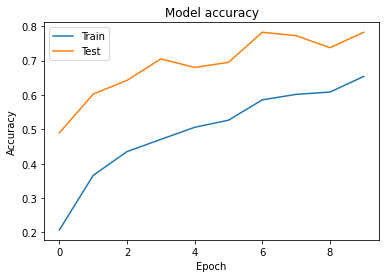

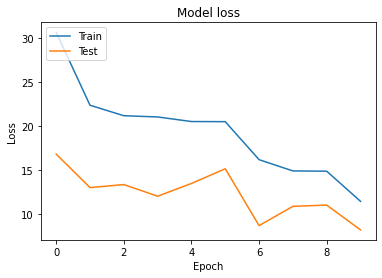

13/13 [==============================] - 21s 2s/step - loss: 5.5585 - accuracy: 0.8200
Test loss: 5.558488368988037
Test accuracy: 0.8199999928474426


In [20]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Experiment 2 : OPTIMIZER (SGD)

In [21]:
base_vgg16 = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (224,224,3))

# Freeze the VGG16 weights.
base_vgg16.trainable = False 

In [22]:
#create new model
model = Sequential()
model.add(base_vgg16)

model.add(Flatten()) #1024#model.add(Dense(256)) 
model.add(Activation('relu'))
model.add(Dense(80)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 activation_2 (Activation)   (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 80)                2007120   
                                                                 
 activation_3 (Activation)   (None, 80)                0         
                                                                 
Total params: 16,721,808
Trainable params: 2,007,120
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
import datetime
start = datetime.datetime.now()
#Compile
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit_generator( 
    train_data, 
    #steps_per_epoch = Train_groups, 
    epochs = 10,
    validation_data = val_data,
    #validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', 
                             patience = 5, 
                             restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', 
                                 factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, 
                                 verbose = 1)])  

end = datetime.datetime.now()
elapsed_incv3_1 = end - start
print ('VGG16 training complete. Elapsed: ', elapsed_incv3_1)

C:\Users\X\AppData\Local\Temp\ipykernel_21012\251922216.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
397/397 [==============================] - 712s 2s/step - loss: 8.9381 - accuracy: 0.0489 - val_loss: 6.4061 - val_accuracy: 0.2075 - lr: 0.0100
Epoch 2/10
397/397 [==============================] - 728s 2s/step - loss: 5.7972 - accuracy: 0.1437 - val_loss: 4.2740 - val_accuracy: 0.3275 - lr: 0.0100
Epoch 3/10
397/397 [==============================] - 719s 2s/step - loss: 4.5455 - accuracy: 0.2254 - val_loss: 4.4500 - val_accuracy: 0.2150 - lr: 0.0100
Epoch 4/10
397/397 [==============================] - 724s 2s/step - loss: 3.7332 - accuracy: 0.2795 - val_loss: 2.3605 - val_accuracy: 0.4850 - lr: 0.0100
Epoch 5/10
397/397 [==============================] - 719s 2s/step - loss: 3.3222 - accuracy: 0.3318 - val_loss: 2.1755 - val_accuracy: 0.5475 - lr: 0.0100
Epoch 6/10
397/397 [==============================] - 725s 2s/step - loss: 3.0108 - accuracy: 0.3636 - val_loss: 1.5307 - val_accuracy: 0.6050 - lr: 0.0100
Epoch 7/10
397/397 [==============================] - 720s 2s/st

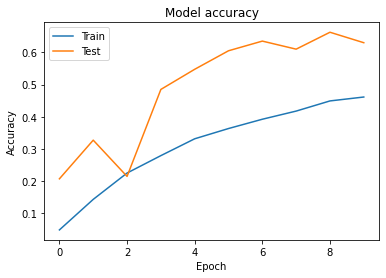

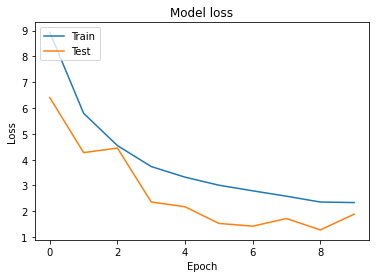

13/13 [==============================] - 20s 2s/step - loss: 1.8810 - accuracy: 0.6225
Test loss: 1.881034255027771
Test accuracy: 0.6225000023841858


In [24]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Experiment 3 : Optimizer (RMSprop)

In [25]:
base_vgg16 = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (224,224,3))

# Freeze the VGG16 weights.
base_vgg16.trainable = False 

In [26]:
#create new model
model = Sequential()
model.add(base_vgg16)

model.add(Flatten()) #1024#model.add(Dense(256)) 
model.add(Activation('relu'))
model.add(Dense(80)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 activation_4 (Activation)   (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 80)                2007120   
                                                                 
 activation_5 (Activation)   (None, 80)                0         
                                                                 
Total params: 16,721,808
Trainable params: 2,007,120
Non-trainable params: 14,714,688
_________________________________________________________________


In [27]:
import datetime
start = datetime.datetime.now()
#Compile
model.compile(tf.keras.optimizers.RMSprop(learning_rate = 0.01),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit_generator( 
    train_data, 
    #steps_per_epoch = Train_groups, 
    epochs = 10,
    validation_data = val_data,
    #validation_steps = Valid_groups,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', 
                             patience = 5, 
                             restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', 
                                 factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, 
                                 verbose = 1)])  

end = datetime.datetime.now()
elapsed_incv3_1 = end - start
print ('VGG16 training complete. Elapsed: ', elapsed_incv3_1)

C:\Users\X\AppData\Local\Temp\ipykernel_21012\2212498149.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
397/397 [==============================] - 653s 2s/step - loss: 68.8327 - accuracy: 0.1077 - val_loss: 36.9896 - val_accuracy: 0.2800 - lr: 0.0100
Epoch 2/10
397/397 [==============================] - 658s 2s/step - loss: 36.4384 - accuracy: 0.2654 - val_loss: 19.1202 - val_accuracy: 0.5425 - lr: 0.0100
Epoch 3/10
397/397 [==============================] - 669s 2s/step - loss: 31.5056 - accuracy: 0.3480 - val_loss: 17.8164 - val_accuracy: 0.5975 - lr: 0.0100
Epoch 4/10
397/397 [==============================] - 672s 2s/step - loss: 28.9321 - accuracy: 0.4066 - val_loss: 17.4169 - val_accuracy: 0.6350 - lr: 0.0100
Epoch 5/10
397/397 [==============================] - 686s 2s/step - loss: 26.7995 - accuracy: 0.4386 - val_loss: 17.5053 - val_accuracy: 0.6300 - lr: 0.0100
Epoch 6/10
397/397 [==============================] - 689s 2s/step - loss: 25.4019 - accuracy: 0.4704 - val_loss: 15.4078 - val_accuracy: 0.6550 - lr: 0.0100
Epoch 7/10
397/397 [==============================] 

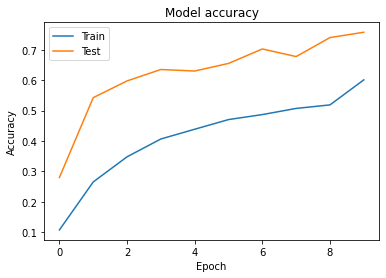

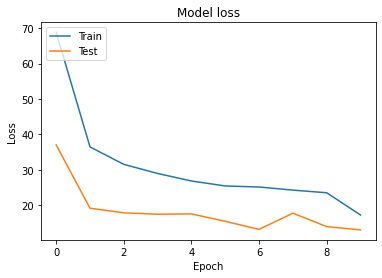

13/13 [==============================] - 20s 2s/step - loss: 8.7919 - accuracy: 0.7725
Test loss: 8.79187297821045
Test accuracy: 0.7724999785423279


In [28]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# VGG16 CONCLUSION

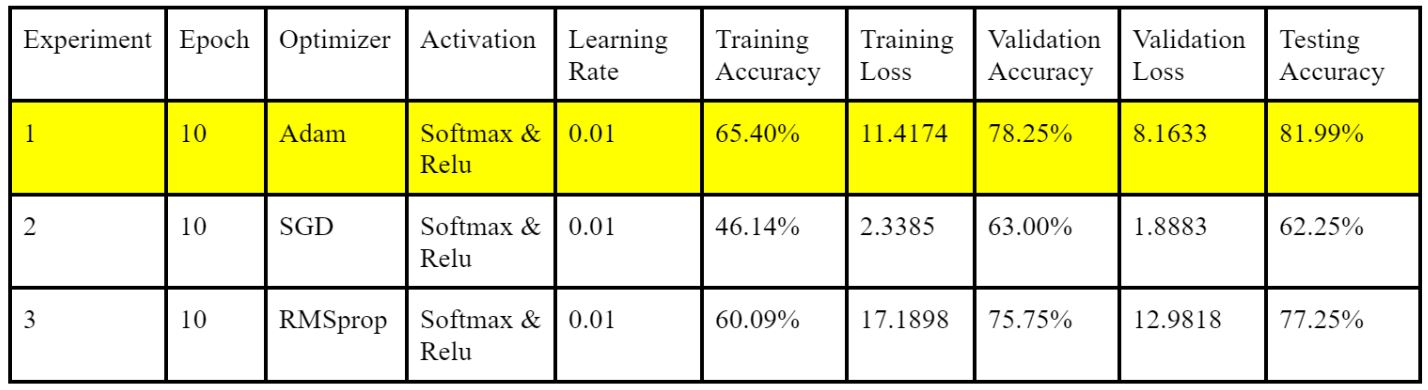

# Xception

In [25]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from collections import Counter
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Activation, Dense, Flatten
#from keras.preprocessing.image import img_to_array, ImageDataGenerator, load_img
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from sklearn.metrics import classification_report

# Experiment 1 : Optimizer (Adam)

In [33]:
class_count = 80

In [34]:
xception_model = Xception(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
xception_model.trainable = False # Freeze the Xception weights.

model = Sequential()
model.add(xception_model)

model.add(Flatten()) 
model.add(Activation('relu'))
model.add(Dense(class_count)) 
model.add(Activation('softmax'))

model.summary()

import datetime
start = datetime.datetime.now()
#Compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),# tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
history = model.fit( 
    train_data,
    epochs = 10,
    validation_data = val_data,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)])

end = datetime.datetime.now()
elapsed_incv3_1 = end - start
print ('Xception training complete. Elapsed: ', elapsed_incv3_1)

83683744/83683744 [==============================] - 6s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 activation_6 (Activation)   (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 80)                8028240   
                                                                 
 activation_7 (Activation)   (None, 80)                0         
                                                                 
Total params: 28,889,720
Trainable params: 8,028,240
Non-trainable params: 20,861,480
___________________________________

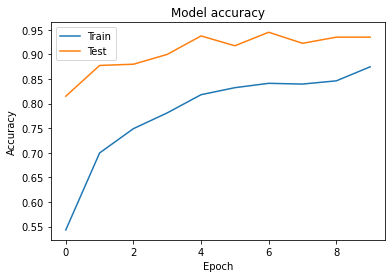

In [35]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

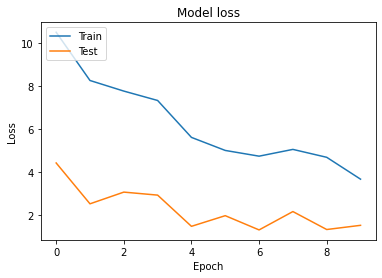

In [36]:
# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [37]:
# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 [==============================] - 11s 870ms/step - loss: 1.6502 - accuracy: 0.9250
Test loss: 1.650199294090271
Test accuracy: 0.925000011920929


# Experiment 2 : OPTIMIZER (SGD)

In [18]:
class_count = 80

In [19]:
xception_model = Xception(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
xception_model.trainable = False # Freeze the Xception weights.

model = Sequential()
model.add(xception_model)

model.add(Flatten()) 
model.add(Activation('relu'))
model.add(Dense(class_count)) 
model.add(Activation('softmax'))

model.summary()

import datetime
start = datetime.datetime.now()
#Compile
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),# tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
history = model.fit( 
    train_data,
    epochs = 10,
    validation_data = val_data,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)])

end = datetime.datetime.now()
elapsed_incv3_1 = end - start
print ('Xception training complete. Elapsed: ', elapsed_incv3_1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 activation (Activation)     (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 80)                8028240   
                                                                 
 activation_1 (Activation)   (None, 80)                0         
                                                                 
Total params: 28,889,720
Trainable params: 8,028,240
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/10
397/397 [================

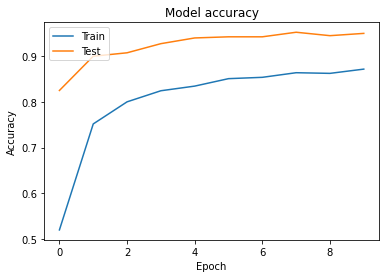

In [20]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

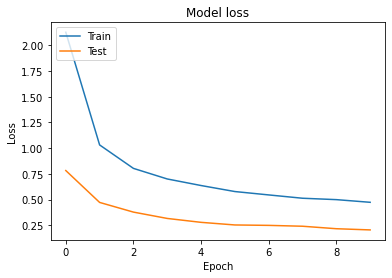

In [21]:
# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 [==============================] - 10s 791ms/step - loss: 0.2091 - accuracy: 0.9450
Test loss: 0.20912283658981323
Test accuracy: 0.9449999928474426


# Experiment 3 : OPTIMIZER (RMSprop)

In [18]:
class_count = 80

In [19]:
xception_model = Xception(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
xception_model.trainable = False # Freeze the Xception weights.

model = Sequential()
model.add(xception_model)
model.add(Flatten()) 
model.add(Activation('relu'))
model.add(Dense(class_count)) 
model.add(Activation('softmax'))

model.summary()

import datetime
start = datetime.datetime.now()
#Compile
model.compile(tf.keras.optimizers.RMSprop(learning_rate = 0.001),# tf.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
history = model.fit( 
    train_data,
    epochs = 10,
    validation_data = val_data,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True),ReduceLROnPlateau(monitor = 'val_loss', factor = 0.7, #0.2 to 0.5 dropped to fast 0.7
                                 patience = 2, verbose = 1)])

end = datetime.datetime.now()
elapsed_incv3_1 = end - start
print ('Xception training complete. Elapsed: ', elapsed_incv3_1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 activation_2 (Activation)   (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 80)                8028240   
                                                                 
 activation_3 (Activation)   (None, 80)                0         
                                                                 
Total params: 28,889,720
Trainable params: 8,028,240
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/10
397/397 [==============

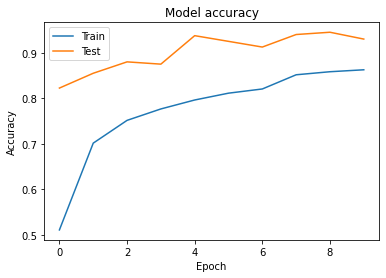

In [20]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

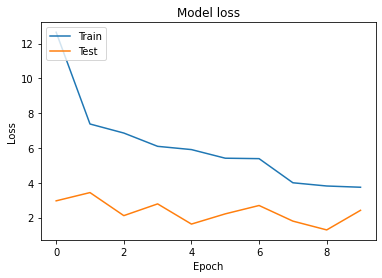

In [21]:
# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 [==============================] - 10s 797ms/step - loss: 1.4084 - accuracy: 0.9200
Test loss: 1.4084309339523315
Test accuracy: 0.9200000166893005


# XCEPTION CONCLUSION

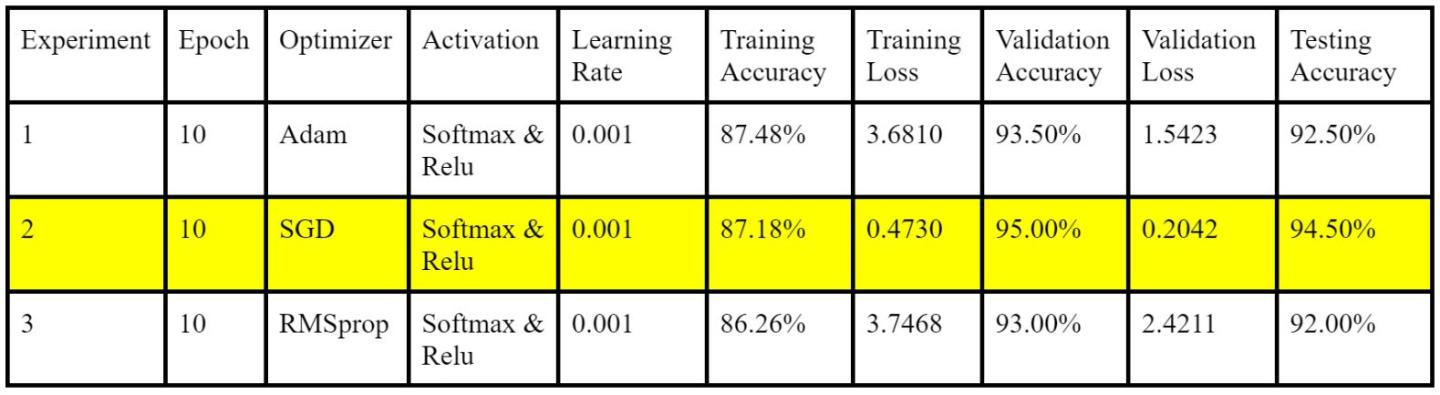

# MobileNetV2

# Experiment 1 : ACTIVATION (ReLU), OPTIMIZER (SGD)

In [24]:
#1.import library
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
#2.import base model
mobile_base = MobileNetV2(input_shape = (224,224,3),
                          include_top = False,
                          weights = 'imagenet')

mn_layers = len(mobile_base.layers)

mobile_base.trainable = False

print('Setting the last {} layers in the Mobile Net Base Model to trainable!\n'.format(0))

for mn_layer in mobile_base.layers[:-0]:
    mn_layer.trainable = False
    
trainableParams = np.sum([np.prod(v.get_shape()) for v in mobile_base.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in mobile_base.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print('The number of trainable parameters in the Mobile Net V2 Base Model is {}.'.format(trainableParams))
print('The number of non-trainable parameters in the Mobile Net V2 Base Model is {}.'.format(nonTrainableParams))
print('The total number of parameters is {}.'.format(totalParams))

#3.build model
inputs = tf.keras.Input(shape = (224,224,3))
x = mobile_base(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

# global average pool to collapse to 1D
x = layers.GlobalAveragePooling2D()(x) 
print(f"Shape after GlobalAveragePooling2D: {x.shape}\n")


outputs_1 = layers.Dense(80, activation='relu')(x)

model_RS = model_RS = tf.keras.Model(inputs, outputs_1)

model_RS.summary()

9406464/9406464 [==============================] - 0s 0us/step
Setting the last 0 layers in the Mobile Net Base Model to trainable!

The number of trainable parameters in the Mobile Net V2 Base Model is 0.0.
The number of non-trainable parameters in the Mobile Net V2 Base Model is 2257984.
The total number of parameters is 2257984.0.
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 loba

In [25]:
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate = 0.001)

early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) 

model_RS.compile(optimizer = optimizer_sgd,
             loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_mn1 = model_RS.fit(train_data,
                    epochs=10,
                    validation_data=val_data,
                    callbacks=[
                      early_stopping
                       ]
                   )

Epoch 1/10
397/397 [==============================] - 205s 513ms/step - loss: 5.9919 - accuracy: 0.0194 - val_loss: 4.4016 - val_accuracy: 0.0400
Epoch 2/10
397/397 [==============================] - 201s 506ms/step - loss: 4.4877 - accuracy: 0.0274 - val_loss: 4.3490 - val_accuracy: 0.0175
Epoch 3/10
397/397 [==============================] - 201s 506ms/step - loss: 4.4643 - accuracy: 0.0205 - val_loss: 4.1878 - val_accuracy: 0.0275
Epoch 4/10
397/397 [==============================] - 201s 505ms/step - loss: 4.3325 - accuracy: 0.0249 - val_loss: 4.1037 - val_accuracy: 0.0275
Epoch 5/10
397/397 [==============================] - 200s 503ms/step - loss: 4.2722 - accuracy: 0.0251 - val_loss: 4.0252 - val_accuracy: 0.0300
Epoch 6/10
397/397 [==============================] - 200s 503ms/step - loss: 4.2090 - accuracy: 0.0248 - val_loss: 3.9482 - val_accuracy: 0.0300
Epoch 7/10
397/397 [==============================] - 201s 507ms/step - loss: 4.1479 - accuracy: 0.0255 - val_loss: 3.8664 -

In [26]:
# Evaluate
loss, accuracy = model_RS.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history_mn1.history)
e_exe = hist_nda.shape[0]

print("\n        MObileNetv2 (Experiment 1)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))
#print("           Elapsed:",elapsed_incv3)

13/13 [==============================] - 4s 288ms/step - loss: 3.7437 - accuracy: 0.0125

        MObileNetv2 (Experiment 1)

  Epochs completed:  10
              Loss: 3.7437
          Accuracy: 1.2500 % 


In [29]:
def plot_loss_curves(history):
  """
  Returns Separate Loss Curves For Training And Validation Metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plotting Loss
  plt.plot(epochs, loss, label='TRAINING_LOSS')
  plt.plot(epochs, val_loss, label='VAL_LOSS')
  plt.title('LOSS')
  plt.xlabel('EPOCHS')
  plt.legend()

In [30]:
def plot_accuracy_curves(history):
  """
  Returns Separate Loss Curves For Training And Validation Metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
    
  # Plotting Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='TRAINING_ACCURACY')
  plt.plot(epochs, val_accuracy, label='VAL_ACCURACY')
  plt.title('ACCURACY')
  plt.xlabel('EPOCHS')
  plt.legend()

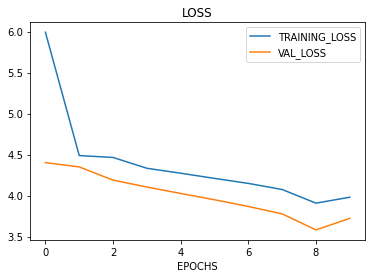

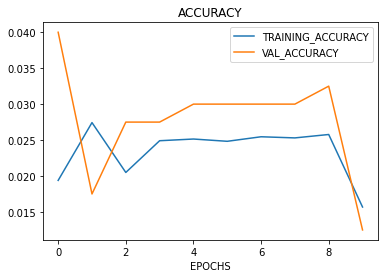

In [31]:
plot_loss_curves(history_mn1)
plot_accuracy_curves(history_mn1)

# Experiment 2 : ACTIVATION (SOFTMAX), OPTIMIZER (ADAM)

In [32]:
mobile_base = MobileNetV2(input_shape = (224,224,3),
                          include_top = False,
                          weights = 'imagenet')

mn_layers = len(mobile_base.layers)

mobile_base.trainable = False

print('Setting the last {} layers in the Mobile Net Base Model to trainable!\n'.format(0))

for mn_layer in mobile_base.layers[:-0]:
    mn_layer.trainable = False
    
trainableParams = np.sum([np.prod(v.get_shape()) for v in mobile_base.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in mobile_base.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print('The number of trainable parameters in the Mobile Net V2 Base Model is {}.'.format(trainableParams))
print('The number of non-trainable parameters in the Mobile Net V2 Base Model is {}.'.format(nonTrainableParams))
print('The total number of parameters is {}.'.format(totalParams))

#3.build model
inputs = tf.keras.Input(shape = (224,224,3))
x = mobile_base(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

# global average pool to collapse to 1D
x = layers.GlobalAveragePooling2D()(x) 
print(f"Shape after GlobalAveragePooling2D: {x.shape}\n")


outputs = layers.Dense(80, activation='softmax')(x)

model_SA = tf.keras.Model(inputs, outputs)

model_SA.summary()

Setting the last 0 layers in the Mobile Net Base Model to trainable!

The number of trainable parameters in the Mobile Net V2 Base Model is 0.0.
The number of non-trainable parameters in the Mobile Net V2 Base Model is 2257984.
The total number of parameters is 2257984.0.
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        


In [33]:
optimizer_Adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) 

model_SA.compile(optimizer = optimizer_Adam,
             loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_nm2 = model_SA.fit(train_data,
                    epochs=10,
                    validation_data=val_data,
                    callbacks=[early_stopping]
                   )

Epoch 1/10
397/397 [==============================] - 205s 511ms/step - loss: 1.7578 - accuracy: 0.5878 - val_loss: 0.6047 - val_accuracy: 0.8850
Epoch 2/10
397/397 [==============================] - 201s 506ms/step - loss: 0.7862 - accuracy: 0.7951 - val_loss: 0.4000 - val_accuracy: 0.9100
Epoch 3/10
397/397 [==============================] - 201s 506ms/step - loss: 0.6221 - accuracy: 0.8316 - val_loss: 0.3302 - val_accuracy: 0.9125
Epoch 4/10
397/397 [==============================] - 201s 505ms/step - loss: 0.5405 - accuracy: 0.8500 - val_loss: 0.2778 - val_accuracy: 0.9375
Epoch 5/10
397/397 [==============================] - 201s 506ms/step - loss: 0.4851 - accuracy: 0.8636 - val_loss: 0.2570 - val_accuracy: 0.9350
Epoch 6/10
397/397 [==============================] - 199s 502ms/step - loss: 0.4408 - accuracy: 0.8781 - val_loss: 0.2528 - val_accuracy: 0.9375
Epoch 7/10
397/397 [==============================] - 202s 509ms/step - loss: 0.4245 - accuracy: 0.8763 - val_loss: 0.2423 -

In [34]:
# Evaluate
loss, accuracy = model_SA.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history_nm2.history)
e_exe = hist_nda.shape[0]

print("\n        MObileNetv2 (Experiment 2)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))

13/13 [==============================] - 4s 290ms/step - loss: 0.1842 - accuracy: 0.9300

        MObileNetv2 (Experiment 2)

  Epochs completed:  10
              Loss: 0.1842
          Accuracy: 93.0000 % 


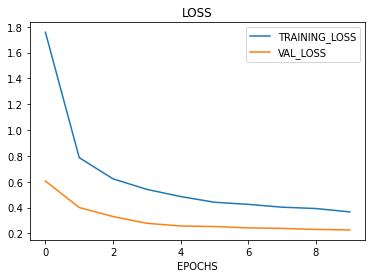

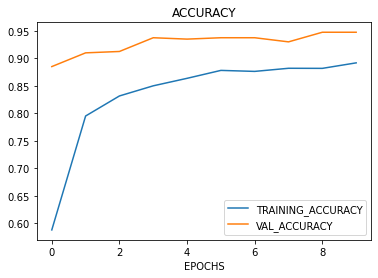

In [36]:
plot_loss_curves(history_nm2)
plot_accuracy_curves(history_nm2)

# Experiment 3 : ACTIVATION (TANH), OPTIMIZER (RMSPROP)

In [37]:
mobile_base = MobileNetV2(input_shape = (224,224,3),
                          include_top = False,
                          weights = 'imagenet')

mn_layers = len(mobile_base.layers)

mobile_base.trainable = False

print('Setting the last {} layers in the Mobile Net Base Model to trainable!\n'.format(0))

for mn_layer in mobile_base.layers[:-0]:
    mn_layer.trainable = False
    
trainableParams = np.sum([np.prod(v.get_shape()) for v in mobile_base.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in mobile_base.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print('The number of trainable parameters in the Mobile Net V2 Base Model is {}.'.format(trainableParams))
print('The number of non-trainable parameters in the Mobile Net V2 Base Model is {}.'.format(nonTrainableParams))
print('The total number of parameters is {}.'.format(totalParams))

#3.build model
inputs = tf.keras.Input(shape = (224,224,3))
x = mobile_base(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

# global average pool to collapse to 1D
x = layers.GlobalAveragePooling2D()(x) 
print(f"Shape after GlobalAveragePooling2D: {x.shape}\n")


outputs = layers.Dense(80, activation='tanh')(x)

model_TR = tf.keras.Model(inputs, outputs)

model_TR.summary()

Setting the last 0 layers in the Mobile Net Base Model to trainable!

The number of trainable parameters in the Mobile Net V2 Base Model is 0.0.
The number of non-trainable parameters in the Mobile Net V2 Base Model is 2257984.
The total number of parameters is 2257984.0.
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        


In [38]:
optimizer_RMSprop = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) 

model_TR.compile(optimizer = optimizer_RMSprop,
             loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_mn3 = model_TR.fit(train_data,
                    epochs=10,
                    validation_data=val_data,
                    callbacks=[early_stopping]
                   )

Epoch 1/10
397/397 [==============================] - 203s 507ms/step - loss: 8.9896 - accuracy: 0.0112 - val_loss: 10.5180 - val_accuracy: 0.0100
Epoch 2/10
397/397 [==============================] - 200s 504ms/step - loss: 9.1853 - accuracy: 0.0146 - val_loss: 10.4365 - val_accuracy: 0.0025
Epoch 3/10
397/397 [==============================] - 202s 510ms/step - loss: nan - accuracy: 0.0117 - val_loss: nan - val_accuracy: 0.0125
Epoch 4/10
397/397 [==============================] - 201s 505ms/step - loss: nan - accuracy: 0.0128 - val_loss: nan - val_accuracy: 0.0125
Epoch 5/10
397/397 [==============================] - 202s 510ms/step - loss: nan - accuracy: 0.0128 - val_loss: nan - val_accuracy: 0.0125
Epoch 6/10
397/397 [==============================] - 200s 504ms/step - loss: nan - accuracy: 0.0128 - val_loss: nan - val_accuracy: 0.0125
Epoch 7/10
397/397 [==============================] - 200s 504ms/step - loss: nan - accuracy: 0.0128 - val_loss: nan - val_accuracy: 0.0125


In [39]:
# Evaluate
loss, accuracy = model_TR.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history_mn3.history)
e_exe = hist_nda.shape[0]

print("\n        MobileNetv2 (Experiment 3)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))

13/13 [==============================] - 4s 292ms/step - loss: 10.6788 - accuracy: 0.0075

        MobileNetv2 (Experiment 3)

  Epochs completed:  7
              Loss: 10.6788
          Accuracy: 0.7500 % 


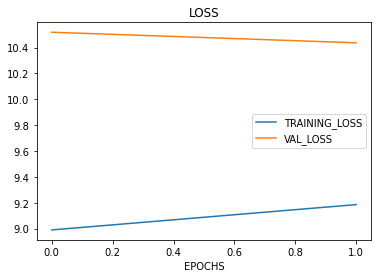

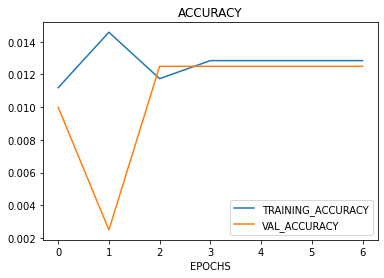

In [41]:
plot_loss_curves(history_mn3)
plot_accuracy_curves(history_mn3)

# MobileNetV2 CONCLUSION

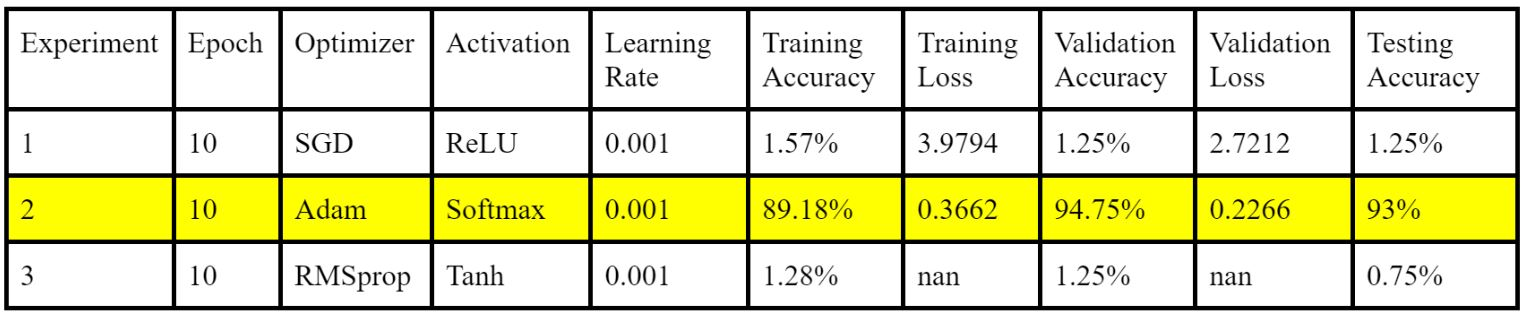

# InceptionResNetV2

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
#1.install library
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Flatten, BatchNormalization, Dense

# Experiment 1 : ACTIVATION (RELU), OPTIMIZER (SGD)

In [83]:
#2.create base model
IRNv2_base = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape = (224,224,3),
                          include_top = False,
                          weights = 'imagenet')

mn_layers = len(IRNv2_base.layers)

# set the base model to be non trainable
IRNv2_base.trainable = False

print('Setting the last {} layers in the InceptionResNetv2 Base Model to trainable!\n'.format(0))

for mn_layer in IRNv2_base.layers[:-0]:
    mn_layer.trainable = False
    
trainableParams = np.sum([np.prod(v.get_shape()) for v in IRNv2_base.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in IRNv2_base.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print('The number of trainable parameters in the InceptionResNet V2 Base Model is {}.'.format(trainableParams))
print('The number of non-trainable parameters in the InceptionResNet V2 Base Model is {}.'.format(nonTrainableParams))
print('The total number of parameters is {}.'.format(totalParams))


#3.build model
inputs = tf.keras.Input(shape = (224,224,3))
x = IRNv2_base(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

# global average pool to collapse to 1D
x = layers.GlobalAveragePooling2D()(x) 
print(f"Shape after GlobalAveragePooling2D: {x.shape}\n")

#4.set the parameters- relu
outputs = layers.Dense(80, activation='relu')(x)

#5.fit the model with all the input and parameter
model_IRNv2_RS = tf.keras.Model(inputs, outputs)

model_IRNv2_RS.summary()

219055592/219055592 [==============================] - 12s 0us/step
Setting the last 0 layers in the InceptionResNetv2 Base Model to trainable!

The number of trainable parameters in the InceptionResNet V2 Base Model is 0.0.
The number of non-trainable parameters in the InceptionResNet V2 Base Model is 54336736.
The total number of parameters is 54336736.0.
Shape after passing inputs through base model: (None, 5, 5, 1536)
Shape after GlobalAveragePooling2D: (None, 1536)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_4   (None, 1536)   

In [84]:
#7.set the parameter- sgd
optimizer_SGD = tf.keras.optimizers.SGD(learning_rate = 0.001)

early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) 

model_IRNv2_RS.compile(optimizer = optimizer_SGD,
             loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_IRNv2_1 = model_IRNv2_RS.fit(train_data,
                    epochs=10,
                    validation_data=val_data,
                    callbacks=[early_stopping]
                   )

Epoch 1/10
397/397 [==============================] - 506s 1s/step - loss: 6.3449 - accuracy: 0.0133 - val_loss: 5.5244 - val_accuracy: 0.0125
Epoch 2/10
397/397 [==============================] - 489s 1s/step - loss: 5.4054 - accuracy: 0.0140 - val_loss: 5.2694 - val_accuracy: 0.0125
Epoch 3/10
397/397 [==============================] - 468s 1s/step - loss: 5.2475 - accuracy: 0.0112 - val_loss: 5.1656 - val_accuracy: 0.0125
Epoch 4/10
397/397 [==============================] - 480s 1s/step - loss: 5.1284 - accuracy: 0.0112 - val_loss: 4.9597 - val_accuracy: 0.0125
Epoch 5/10
397/397 [==============================] - 492s 1s/step - loss: 4.9873 - accuracy: 0.0112 - val_loss: 4.8946 - val_accuracy: 0.0125
Epoch 6/10
397/397 [==============================] - 498s 1s/step - loss: 4.9325 - accuracy: 0.0112 - val_loss: 4.8367 - val_accuracy: 0.0125
Epoch 7/10
397/397 [==============================] - 469s 1s/step - loss: 4.8852 - accuracy: 0.0112 - val_loss: 4.7819 - val_accuracy: 0.0125

In [85]:
# Evaluate
loss, accuracy = model_IRNv2_RS.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history_IRNv2_1.history)
e_exe = hist_nda.shape[0]

print("\n        InceptionResNetv2 (Experiment 1)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))

13/13 [==============================] - 14s 1s/step - loss: 4.4809 - accuracy: 0.0125

        InceptionResNetv2 (Experiment 1)

  Epochs completed:  10
              Loss: 4.4809
          Accuracy: 1.2500 % 


In [87]:
def plot_loss_curves(history):
  """
  Returns Separate Loss Curves For Training And Validation Metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plotting Loss
  plt.plot(epochs, loss, label='TRAINING_LOSS')
  plt.plot(epochs, val_loss, label='VAL_LOSS')
  plt.title('LOSS')
  plt.xlabel('EPOCHS')
  plt.legend()

In [88]:
def plot_accuracy_curves(history):
  """
  Returns Separate Loss Curves For Training And Validation Metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
    
  # Plotting Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='TRAINING_ACCURACY')
  plt.plot(epochs, val_accuracy, label='VAL_ACCURACY')
  plt.title('ACCURACY')
  plt.xlabel('EPOCHS')
  plt.legend()

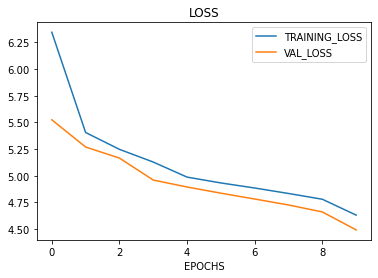

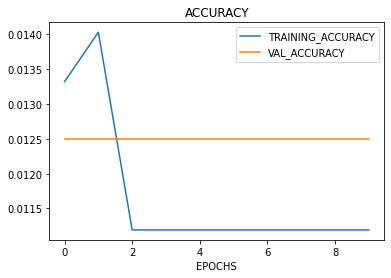

In [89]:
plot_loss_curves(history_IRNv2_1)
plot_accuracy_curves(history_IRNv2_1)

# Experiment 2 : ACTIVATION (SOFTMAX), OPTIMIZER (ADAM)

In [90]:
#2.create base model
IRNv2_base = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape = (224,224,3),
                          include_top = False,
                          weights = 'imagenet')

mn_layers = len(IRNv2_base.layers)

IRNv2_base.trainable = False

print('Setting the last {} layers in the InceptionResNetv2 Base Model to trainable!\n'.format(0))

for mn_layer in IRNv2_base.layers[:-0]:
    mn_layer.trainable = False
    
trainableParams = np.sum([np.prod(v.get_shape()) for v in IRNv2_base.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in IRNv2_base.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print('The number of trainable parameters in the InceptionResNet V2 Base Model is {}.'.format(trainableParams))
print('The number of non-trainable parameters in the InceptionResNet V2 Base Model is {}.'.format(nonTrainableParams))
print('The total number of parameters is {}.'.format(totalParams))

#3.build model
inputs = tf.keras.Input(shape = (224,224,3))
x = IRNv2_base(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

# global average pool to collapse to 1D
x = layers.GlobalAveragePooling2D()(x) 
print(f"Shape after GlobalAveragePooling2D: {x.shape}\n")


outputs = layers.Dense(80, activation='softmax')(x)

model_IRNv2_SA = tf.keras.Model(inputs, outputs)

model_IRNv2_SA.summary()

Setting the last 0 layers in the InceptionResNetv2 Base Model to trainable!

The number of trainable parameters in the InceptionResNet V2 Base Model is 0.0.
The number of non-trainable parameters in the InceptionResNet V2 Base Model is 54336736.
The total number of parameters is 54336736.0.
Shape after passing inputs through base model: (None, 5, 5, 1536)
Shape after GlobalAveragePooling2D: (None, 1536)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_5   (None, 1536)             0         
 (GlobalAveragePooling2D)                      

In [91]:
optimizer_Adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) 

model_IRNv2_SA.compile(optimizer = optimizer_Adam,
             loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_IRNv2_2 = model_IRNv2_SA.fit(train_data,
                    epochs=10,
                    validation_data=val_data,
                    callbacks=[early_stopping]
                   )

Epoch 1/10
397/397 [==============================] - 608s 2s/step - loss: 1.6909 - accuracy: 0.5585 - val_loss: 0.6351 - val_accuracy: 0.8075
Epoch 2/10
397/397 [==============================] - 697s 2s/step - loss: 0.9364 - accuracy: 0.7293 - val_loss: 0.4960 - val_accuracy: 0.8425
Epoch 3/10
397/397 [==============================] - 914s 2s/step - loss: 0.8087 - accuracy: 0.7627 - val_loss: 0.4040 - val_accuracy: 0.8875
Epoch 4/10
397/397 [==============================] - 1030s 3s/step - loss: 0.7348 - accuracy: 0.7866 - val_loss: 0.3606 - val_accuracy: 0.8775
Epoch 5/10
397/397 [==============================] - 955s 2s/step - loss: 0.6748 - accuracy: 0.8015 - val_loss: 0.3841 - val_accuracy: 0.8850
Epoch 6/10
397/397 [==============================] - 947s 2s/step - loss: 0.6360 - accuracy: 0.8141 - val_loss: 0.3738 - val_accuracy: 0.8750
Epoch 7/10
397/397 [==============================] - 953s 2s/step - loss: 0.6045 - accuracy: 0.8203 - val_loss: 0.2754 - val_accuracy: 0.922

In [101]:
# Evaluate
loss, accuracy = model_IRNv2_SA.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history_IRNv2_2.history)
e_exe = hist_nda.shape[0]

print("\n        InceptionResNetv2 (Experiment 2)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))

13/13 [==============================] - 14s 1s/step - loss: 0.2224 - accuracy: 0.9325

        InceptionResNetv2 (Experiment 2)

  Epochs completed:  10
              Loss: 0.2224
          Accuracy: 93.2500 % 


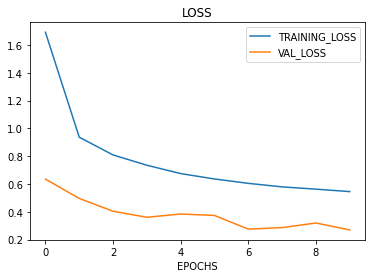

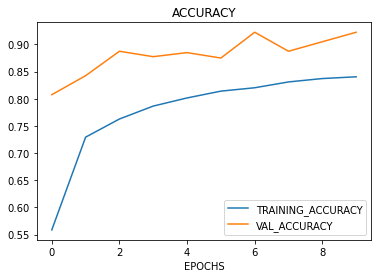

In [94]:
plot_loss_curves(history_IRNv2_2)
plot_accuracy_curves(history_IRNv2_2)

# Experiment 3 : ACTIVATION (TANH), OPTIMIZER (RMSPROP)

In [95]:
IRNv2_base = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape = (224,224,3),
                          include_top = False,
                          weights = 'imagenet')

mn_layers = len(IRNv2_base.layers)

IRNv2_base.trainable = False

print('Setting the last {} layers in the InceptionResNetv2 Base Model to trainable!\n'.format(0))

for mn_layer in IRNv2_base.layers[:-0]:
    mn_layer.trainable = False
    
trainableParams = np.sum([np.prod(v.get_shape()) for v in IRNv2_base.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in IRNv2_base.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print('The number of trainable parameters in the InceptionResNet V2 Base Model is {}.'.format(trainableParams))
print('The number of non-trainable parameters in the InceptionResNet V2 Base Model is {}.'.format(nonTrainableParams))
print('The total number of parameters is {}.'.format(totalParams))

#3.build model
inputs = tf.keras.Input(shape = (224,224,3))
x = IRNv2_base(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

# global average pool to collapse to 1D
x = layers.GlobalAveragePooling2D()(x) 
print(f"Shape after GlobalAveragePooling2D: {x.shape}\n")


outputs = layers.Dense(80, activation='tanh')(x)

model_IRNv2_TR = tf.keras.Model(inputs, outputs)

model_IRNv2_TR.summary()

Setting the last 0 layers in the InceptionResNetv2 Base Model to trainable!

The number of trainable parameters in the InceptionResNet V2 Base Model is 0.0.
The number of non-trainable parameters in the InceptionResNet V2 Base Model is 54336736.
The total number of parameters is 54336736.0.
Shape after passing inputs through base model: (None, 5, 5, 1536)
Shape after GlobalAveragePooling2D: (None, 1536)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_6   (None, 1536)             0         
 (GlobalAveragePooling2D)                     

In [83]:
optimizer_RMSprop = tf.keras.optimizers.RMSprop(learning_rate = 0.0001)

early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) 

model_IRNv2_TR.compile(optimizer = optimizer_RMSprop,
             loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_IRNv2_3 = model_IRNv2_TR.fit(train_data,
                    epochs=10,
                    validation_data=validation_data,
                    callbacks=[early_stopping]
                   )

Epoch 1/10
397/397 [==============================] - 227s 552ms/step - loss: 9.0953 - accuracy: 0.0128 - val_loss: 9.3835 - val_accuracy: 0.0025
Epoch 2/10
397/397 [==============================] - 492s 1s/step - loss: 8.9566 - accuracy: 0.0145 - val_loss: 9.7399 - val_accuracy: 0.0100
Epoch 3/10
397/397 [==============================] - 490s 1s/step - loss: 9.4037 - accuracy: 0.0107 - val_loss: 10.2379 - val_accuracy: 0.0125
Epoch 4/10
397/397 [==============================] - 491s 1s/step - loss: 9.4090 - accuracy: 0.0125 - val_loss: 9.9609 - val_accuracy: 0.0075
Epoch 5/10
397/397 [==============================] - 490s 1s/step - loss: 9.2849 - accuracy: 0.0156 - val_loss: 10.2819 - val_accuracy: 0.0200
Epoch 6/10
397/397 [==============================] - 488s 1s/step - loss: 9.3741 - accuracy: 0.0141 - val_loss: 9.5709 - val_accuracy: 0.0150


In [84]:
# Evaluate
loss, accuracy = model_IRNv2_TR.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history_IRNv2_3.history)
e_exe = hist_nda.shape[0]

print("\n        InceptionResNetv2 (Experiment 3)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))

13/13 [==============================] - 15s 1s/step - loss: 9.7501 - accuracy: 0.0000e+00

        InceptionResNetv2 (Experiment 3)

  Epochs completed:  6
              Loss: 9.7501
          Accuracy: 0.0000 % 


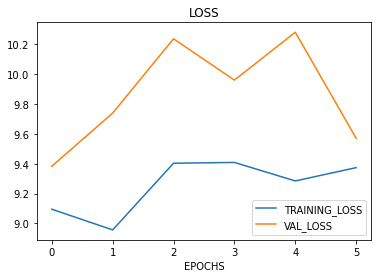

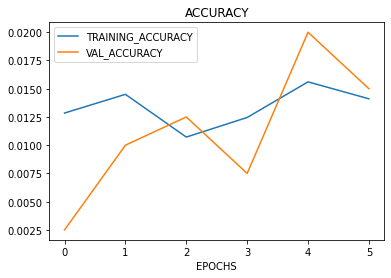

In [88]:
plot_loss_curves(history_IRNv2_3)
plot_accuracy_curves(history_IRNv2_3)

# InceptionResNetV2 CONCLUSION

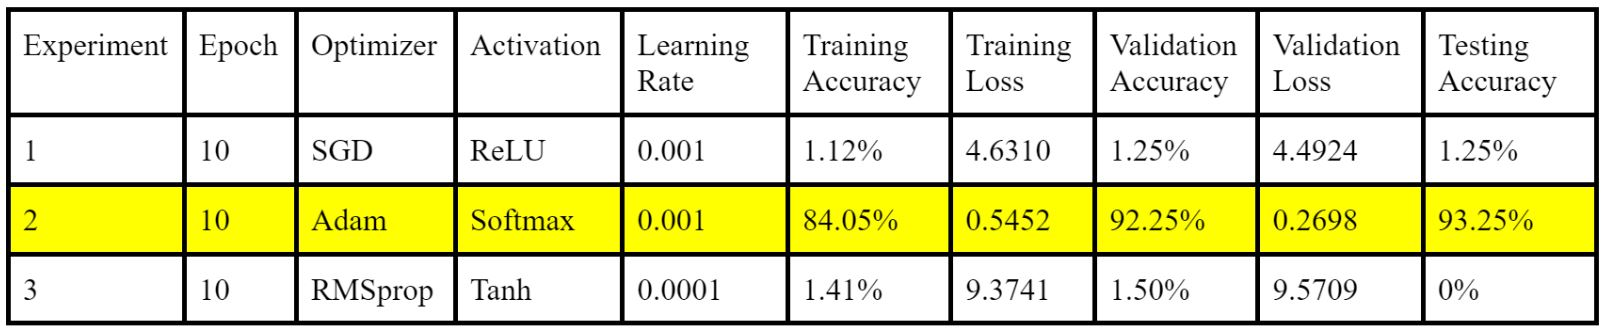

# PART A CONCLUSION

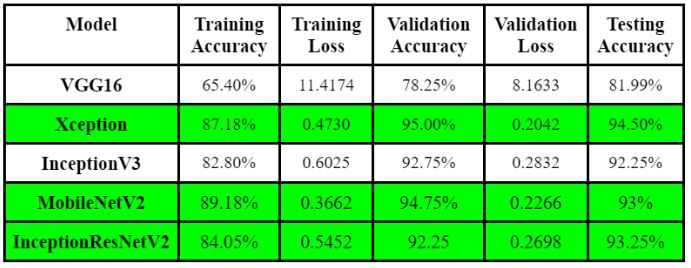

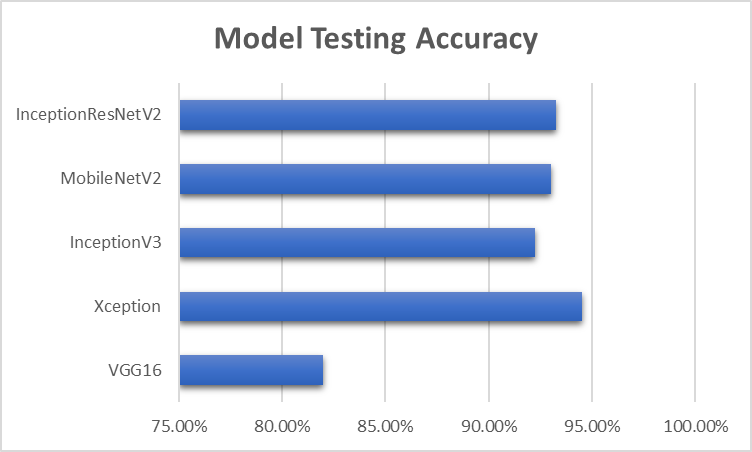

# PART B : FINE TUNE

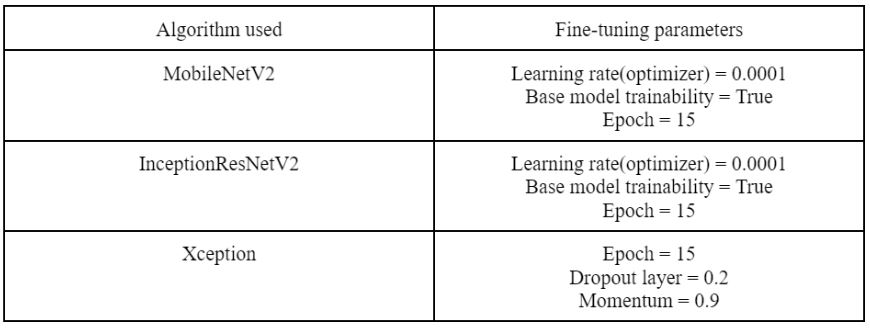

# FINE TUNING MobileNetV2 MODEL

In [26]:
mobile_base = MobileNetV2(input_shape = (224,224,3),
                          include_top = False,
                          weights = 'imagenet')

mn_layers = len(mobile_base.layers)
mobile_base.trainable = True
print('Setting the last {} layers in the Mobile Net Base Model to trainable!\n'.format(0))
for mn_layer in mobile_base.layers[:-0]:
    mn_layer.trainable = False
    
trainableParams = np.sum([np.prod(v.get_shape()) for v in mobile_base.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in mobile_base.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams
print('The number of trainable parameters in the Mobile Net V2 Base Model is {}.'.format(trainableParams))
print('The number of non-trainable parameters in the Mobile Net V2 Base Model is {}.'.format(nonTrainableParams))
print('The total number of parameters is {}.'.format(totalParams))

#3.build model
inputs = tf.keras.Input(shape = (224,224,3))
x = mobile_base(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")
# global average pool to collapse to 1D
x = layers.GlobalAveragePooling2D()(x) 
print(f"Shape after GlobalAveragePooling2D: {x.shape}\n")
outputs = layers.Dense(80, activation='softmax')(x)
model_SA_FT = tf.keras.Model(inputs, outputs)
model_SA_FT.summary()

Setting the last 0 layers in the Mobile Net Base Model to trainable!

The number of trainable parameters in the Mobile Net V2 Base Model is 2223872.
The number of non-trainable parameters in the Mobile Net V2 Base Model is 34112.
The total number of parameters is 2257984.
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        


In [75]:
optimizer_Adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)

early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) 

model_SA_FT.compile(optimizer = optimizer_Adam,
             loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_nm2_FT = model_SA_FT.fit(train_data,
                    epochs=15,
                    validation_data=validation_data,
                    callbacks=[early_stopping]
                   )

Epoch 1/15
397/397 [==============================] - 658s 2s/step - loss: 1.7191 - accuracy: 0.6249 - val_loss: 0.8187 - val_accuracy: 0.7825
Epoch 2/15
397/397 [==============================] - 641s 2s/step - loss: 0.4469 - accuracy: 0.8923 - val_loss: 0.5413 - val_accuracy: 0.8450
Epoch 3/15
397/397 [==============================] - 649s 2s/step - loss: 0.2841 - accuracy: 0.9271 - val_loss: 0.3899 - val_accuracy: 0.9000
Epoch 4/15
397/397 [==============================] - 649s 2s/step - loss: 0.2080 - accuracy: 0.9454 - val_loss: 0.2024 - val_accuracy: 0.9550
Epoch 5/15
397/397 [==============================] - 633s 2s/step - loss: 0.1621 - accuracy: 0.9566 - val_loss: 0.1452 - val_accuracy: 0.9650
Epoch 6/15
397/397 [==============================] - 627s 2s/step - loss: 0.1320 - accuracy: 0.9670 - val_loss: 0.1191 - val_accuracy: 0.9675
Epoch 7/15
397/397 [==============================] - 640s 2s/step - loss: 0.1139 - accuracy: 0.9685 - val_loss: 0.1039 - val_accuracy: 0.9725

In [76]:
# Evaluate
loss, accuracy = model_SA_FT.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history_nm2_FT.history)
e_exe = hist_nda.shape[0]

print("\n        MObileNetv2 (Experiment 2)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))

13/13 [==============================] - 4s 312ms/step - loss: 0.0993 - accuracy: 0.9675

        MObileNetv2 (Experiment 2)

  Epochs completed:  15
              Loss: 0.0993
          Accuracy: 96.7500 % 


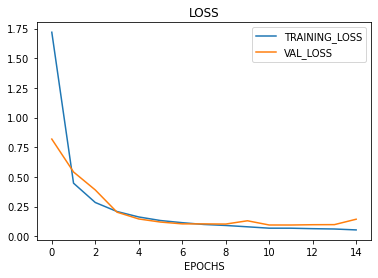

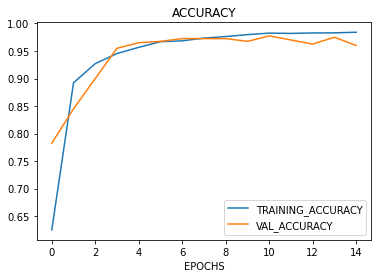

In [336]:
plot_loss_curves(history_nm2_FT)
plot_accuracy_curves(history_nm2_FT)

In [338]:
model_SA_FT.save('my_model_MNV2.h5')

In [22]:
pred_model1 = tf.keras.models.load_model('my_model_MNV2.h5')

In [23]:
y_test_1 = test_data.classes
y_pred_1 = pred_model1.predict(test_data)
y_pred_1 = np.argmax(y_pred_1,axis=1)

13/13 [==============================] - 13s 836ms/step


In [24]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test_1, y_pred_1, target_names=labels, zero_division=1))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       1.00      1.00      1.00         5
                ABBOTTS BOOBY       1.00      1.00      1.00         5
   ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
        AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
       AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
                  BAIKAL TEAL       1.00      1.00      1.00         5
                   BALD EAGLE       1.00      1.00      1.00         5
                    BALD IBIS       1.00      1.00      1.00         5
                BALI STARLING       1.00      1.00      1.00         5
             BALTIMORE ORIOLE       1.00      1.00      1.00         5
           CAATINGA CACHOLOTE       1.00      1.00      1.00         5
              CABOTS TRAGOPAN       0.71      1.00      0.83         5
                  CACTUS WREN       1.00      0.80      0.89         5
     

In [25]:
report_mob = classification_report(y_test_1, y_pred_1, target_names=labels, output_dict=True, zero_division=1)
precision_mob = report_mob['weighted avg']['precision']
recall_mob = report_mob['weighted avg']['recall']
f1_score_mob = report_mob['weighted avg']['f1-score']
print(f"Precision: {precision_mob:.2f}")
print(f"Recall: {recall_mob:.2f}")
print(f"F1-score: {f1_score_mob:.2f}")

Precision: 0.98
Recall: 0.96
F1-score: 0.96


In [27]:
y_pred_1 = pred_model1.predict(test_data)
y_pred_1 = y_pred_1.reshape((-1, len(labels)))

13/13 [==============================] - 11s 843ms/step


In [28]:
from sklearn.metrics import roc_auc_score

y_test = test_data.classes
y_pred_prob = pred_model1.predict(test_data)

# Convert probabilities to binary class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate AUC-ROC
auc_roc_mob = roc_auc_score(y_test_1, y_pred_1, multi_class='ovr')

print('AUC-ROC: {:.4f}'.format(auc_roc_mob))

13/13 [==============================] - 12s 884ms/step
AUC-ROC: 1.0000


In [29]:
loss_mob, accuracy_mob = pred_model1.evaluate(test_data)

13/13 [==============================] - 15s 915ms/step - loss: 0.1022 - accuracy: 0.9650


# FINE TUNING InceptionResNetV2 MODEL

In [183]:
#2.create base model
IRNv2_base = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape = (224,224,3),
                          include_top = False,
                          weights = 'imagenet')

mn_layers = len(IRNv2_base.layers)

IRNv2_base.trainable = True

print('Setting the last {} layers in the InceptionResNetv2 Base Model to trainable!\n'.format(0))

for mn_layer in IRNv2_base.layers[:-0]:
    mn_layer.trainable = False
    
trainableParams = np.sum([np.prod(v.get_shape()) for v in IRNv2_base.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in IRNv2_base.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print('The number of trainable parameters in the InceptionResNet V2 Base Model is {}.'.format(trainableParams))
print('The number of non-trainable parameters in the InceptionResNet V2 Base Model is {}.'.format(nonTrainableParams))
print('The total number of parameters is {}.'.format(totalParams))

#3.build model
inputs = tf.keras.Input(shape = (224,224,3))
x = IRNv2_base(inputs)

print(f"Shape after passing inputs through base model: {x.shape}")

# global average pool to collapse to 1D
x = layers.GlobalAveragePooling2D()(x) 
print(f"Shape after GlobalAveragePooling2D: {x.shape}\n")


outputs = layers.Dense(80, activation='softmax')(x)

model_IRNv2_FT_SA = tf.keras.Model(inputs, outputs)

model_IRNv2_FT_SA.summary()

Setting the last 0 layers in the InceptionResNetv2 Base Model to trainable!

The number of trainable parameters in the InceptionResNet V2 Base Model is 54276192.
The number of non-trainable parameters in the InceptionResNet V2 Base Model is 60544.
The total number of parameters is 54336736.
Shape after passing inputs through base model: (None, 5, 5, 1536)
Shape after GlobalAveragePooling2D: (None, 1536)

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_116 (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_57  (None, 1536)             0         
  (GlobalAveragePooling2D)                    

In [184]:
optimizer_Adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)

early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) 

model_IRNv2_FT_SA.compile(optimizer = optimizer_Adam,
             loss = "categorical_crossentropy",
              metrics=['accuracy'])

history_IRNv2_FT = model_IRNv2_FT_SA.fit(train_data,
                    epochs=15,
                    validation_data=val_data,
                    callbacks=[early_stopping]
                   )

Epoch 1/15
397/397 [==============================] - 182s 400ms/step - loss: 1.1688 - accuracy: 0.7255 - val_loss: 0.2963 - val_accuracy: 0.9150
Epoch 2/15
397/397 [==============================] - 153s 385ms/step - loss: 0.2940 - accuracy: 0.9169 - val_loss: 0.1307 - val_accuracy: 0.9650
Epoch 3/15
397/397 [==============================] - 154s 388ms/step - loss: 0.1994 - accuracy: 0.9421 - val_loss: 0.0965 - val_accuracy: 0.9675
Epoch 4/15
397/397 [==============================] - 156s 392ms/step - loss: 0.1596 - accuracy: 0.9553 - val_loss: 0.1062 - val_accuracy: 0.9800
Epoch 5/15
397/397 [==============================] - 154s 386ms/step - loss: 0.1266 - accuracy: 0.9632 - val_loss: 0.0873 - val_accuracy: 0.9775
Epoch 6/15
397/397 [==============================] - 156s 393ms/step - loss: 0.1152 - accuracy: 0.9662 - val_loss: 0.0647 - val_accuracy: 0.9850
Epoch 7/15
397/397 [==============================] - 156s 392ms/step - loss: 0.0887 - accuracy: 0.9751 - val_loss: 0.0810 -

In [185]:
# Evaluate
loss, accuracy = model_IRNv2_FT_SA.evaluate(test_data) 
 
# Report
hist_nda = pd.DataFrame(history_IRNv2_FT.history)
e_exe = hist_nda.shape[0]

print("\n        InceptionResNetv2 (Experiment Fine Tuning)\n")
print("  Epochs completed: ", e_exe)
print("              Loss: {0:.4f}".format(loss))
print("          Accuracy: {0:.4f} % ".format(accuracy * 100.0))

13/13 [==============================] - 2s 111ms/step - loss: 0.0525 - accuracy: 0.9900

        InceptionResNetv2 (Experiment Fine Tuning)

  Epochs completed:  11
              Loss: 0.0525
          Accuracy: 99.0000 % 


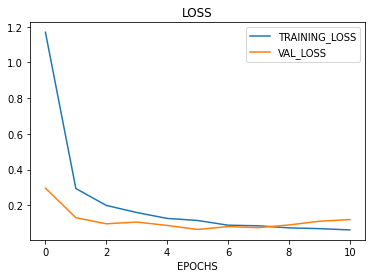

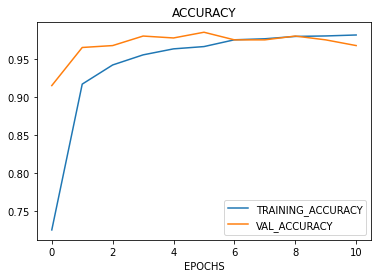

In [187]:
plot_loss_curves(history_IRNv2_FT)
plot_accuracy_curves(history_IRNv2_FT)

In [30]:
pred_model2 = tf.keras.models.load_model('my_model_IRNv2.h5')

In [31]:
y_test_2 = test_data.classes
y_pred_2 = pred_model2.predict(test_data)
y_pred_2 = np.argmax(y_pred_2,axis=1)

13/13 [==============================] - 86s 6s/step


In [32]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test_2, y_pred_2, target_names=labels, zero_division=1))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       1.00      1.00      1.00         5
                ABBOTTS BOOBY       1.00      1.00      1.00         5
   ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
        AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
       AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
                  BAIKAL TEAL       1.00      1.00      1.00         5
                   BALD EAGLE       1.00      1.00      1.00         5
                    BALD IBIS       0.83      1.00      0.91         5
                BALI STARLING       1.00      1.00      1.00         5
             BALTIMORE ORIOLE       1.00      1.00      1.00         5
           CAATINGA CACHOLOTE       1.00      1.00      1.00         5
              CABOTS TRAGOPAN       1.00      1.00      1.00         5
                  CACTUS WREN       1.00      1.00      1.00         5
     

In [33]:
report_inc = classification_report(y_test_2, y_pred_2, target_names=labels, output_dict=True, zero_division=1)
precision_inc = report_inc['weighted avg']['precision']
recall_inc = report_inc['weighted avg']['recall']
f1_score_inc = report_inc['weighted avg']['f1-score']
print(f"Precision: {precision_inc:.2f}")
print(f"Recall: {recall_inc:.2f}")
print(f"F1-score: {f1_score_inc:.2f}")

Precision: 0.99
Recall: 0.99
F1-score: 0.99


In [34]:
y_pred_2 = pred_model2.predict(test_data)
y_pred_2 = y_pred_2.reshape((-1, len(labels)))

13/13 [==============================] - 77s 6s/step


In [35]:
from sklearn.metrics import roc_auc_score

y_test = test_data.classes
y_pred_prob = pred_model2.predict(test_data)

# Convert probabilities to binary class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate AUC-ROC
auc_roc_inc = roc_auc_score(y_test_2, y_pred_2, multi_class='ovr')

print('AUC-ROC: {:.4f}'.format(auc_roc_inc))

13/13 [==============================] - 74s 6s/step
AUC-ROC: 1.0000


In [36]:
loss_inc, accuracy_inc = pred_model2.evaluate(test_data)

13/13 [==============================] - 80s 6s/step - loss: 0.0495 - accuracy: 0.9900


# FINE TUNING Xception MODEL

In [16]:
#For fine-tune , 15 epochs , 0.2 dropout ,  momentum=0.9
xception_model = Xception(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
xception_model.trainable = False # Freeze the Xception weights.

model = Sequential()
model.add(xception_model)

model.add(Flatten()) 
model.add(Activation('relu'))
model.add(Dense(80)) 
model.add(Activation('softmax'))
model.add(Dropout(0.2))

model.summary()

import datetime
start = datetime.datetime.now()
#Compile
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum=0.9),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
history = model.fit( 
    train_data,
    epochs = 15,
    validation_data = val_data,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', 
                             patience = 5, 
                             restore_best_weights = True),
               ReduceLROnPlateau(monitor = 'val_loss', 
                                 factor = 0.7, 
                                 patience = 2, 
                                 verbose = 1)])

end = datetime.datetime.now()
elapsed_incv3_1 = end - start
print ('Xception training complete. Elapsed: ', elapsed_incv3_1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 activation (Activation)     (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 80)                8028240   
                                                                 
 activation_1 (Activation)   (None, 80)                0         
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
Total params: 28,889,720
Trainable params: 8,028,240
Non

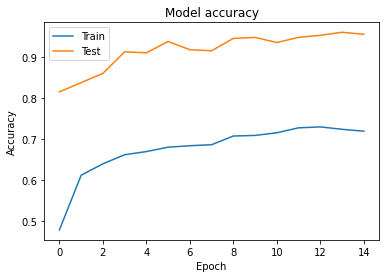

In [17]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

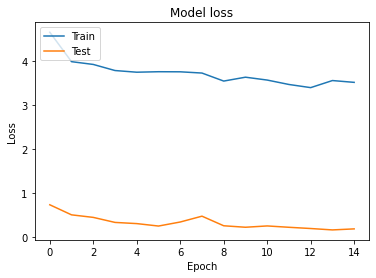

In [18]:
# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
# Evaluate against test data.
scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 [==============================] - 11s 805ms/step - loss: 0.1636 - accuracy: 0.9550
Test loss: 0.16359558701515198
Test accuracy: 0.9549999833106995


In [37]:
pred_model3 = tf.keras.models.load_model('xceptionFineTune.h5')

In [38]:
y_test_3 = test_data.classes
y_pred_3 = pred_model3.predict(test_data)
y_pred_3 = np.argmax(y_pred_3,axis=1)

13/13 [==============================] - 60s 4s/step


In [129]:
print(classification_report(y_test_3, y_pred_3, target_names=labels, zero_division=1))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       1.00      0.80      0.89         5
                ABBOTTS BOOBY       1.00      1.00      1.00         5
   ABYSSINIAN GROUND HORNBILL       1.00      1.00      1.00         5
        AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
       AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
                  BAIKAL TEAL       1.00      1.00      1.00         5
                   BALD EAGLE       1.00      1.00      1.00         5
                    BALD IBIS       1.00      1.00      1.00         5
                BALI STARLING       1.00      1.00      1.00         5
             BALTIMORE ORIOLE       0.83      1.00      0.91         5
           CAATINGA CACHOLOTE       1.00      0.80      0.89         5
              CABOTS TRAGOPAN       1.00      1.00      1.00         5
                  CACTUS WREN       0.83      1.00      0.91         5
     

In [39]:
report_xcpt = classification_report(y_test_3, y_pred_3, target_names=labels, output_dict=True, zero_division=1)
precision_xcpt = report_xcpt['weighted avg']['precision']
recall_xcpt = report_xcpt['weighted avg']['recall']
f1_score_xcpt = report_xcpt['weighted avg']['f1-score']
print(f"Precision: {precision_xcpt:.2f}")
print(f"Recall: {recall_xcpt:.2f}")
print(f"F1-score: {f1_score_xcpt:.2f}")

Precision: 0.97
Recall: 0.96
F1-score: 0.96


In [40]:
y_pred_3 = pred_model3.predict(test_data)
y_pred_3 = y_pred_3.reshape((-1, len(labels)))

13/13 [==============================] - 58s 4s/step


In [41]:
from sklearn.metrics import roc_auc_score

y_test = test_data.classes
y_pred_prob = pred_model3.predict(test_data)

# Convert probabilities to binary class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate AUC-ROC
auc_roc_xcpt = roc_auc_score(y_test_3, y_pred_3, multi_class='ovr')

print('AUC-ROC: {:.4f}'.format(auc_roc_xcpt))

13/13 [==============================] - 57s 4s/step
AUC-ROC: 0.9998


In [42]:
loss_xcpt, accuracy_xcpt = pred_model1.evaluate(test_data)

13/13 [==============================] - 14s 899ms/step - loss: 0.1022 - accuracy: 0.9650


# PART B CONCLUSION

In [92]:
!pip install prettytable

In [50]:
from prettytable import PrettyTable

# Define the headers and add them to the table
headers = ["Model","Accuracy", "Loss", "Precision", "Recall", "F1-score", "AUC-ROC"]
table = PrettyTable(headers)

# Set the padding width
table.padding_width = 4

# Add the data for each model to the table
table.add_row(["InceptionResNetv2", format(accuracy_inc, '.4f'),
    format(loss_inc, '.4f'),
    format(precision_inc, '.4f'),
    format(recall_inc, '.4f'),
    format(f1_score_inc, '.4f'),
    format(auc_roc_inc, '.4f')])
table.add_row(["MobileNetV2", format(accuracy_mob, '.4f'),
    format(loss_mob, '.4f'),
    format(precision_mob, '.4f'),
    format(recall_mob, '.4f'),
    format(f1_score_mob, '.4f'),
    format(auc_roc_mob, '.4f')])
table.add_row(["Xception", format(accuracy_xcpt, '.4f'),
    format(loss_xcpt, '.4f'),
    format(precision_xcpt, '.4f'),
    format(recall_xcpt, '.4f'),
    format(f1_score_xcpt, '.4f'),
    format(auc_roc_xcpt, '.4f')])

# Print the table
print(table)

+-------------------------+----------------+--------------+-----------------+--------------+----------------+---------------+
|          Model          |    Accuracy    |     Loss     |    Precision    |    Recall    |    F1-score    |    AUC-ROC    |
+-------------------------+----------------+--------------+-----------------+--------------+----------------+---------------+
|    InceptionResNetv2    |     0.9900     |    0.0495    |      0.9917     |    0.9900    |     0.9896     |     1.0000    |
|       MobileNetV2       |     0.9650     |    0.1022    |      0.9783     |    0.9650    |     0.9606     |     1.0000    |
|         Xception        |     0.9650     |    0.1022    |      0.9670     |    0.9600    |     0.9585     |     0.9998    |
+-------------------------+----------------+--------------+-----------------+--------------+----------------+---------------+


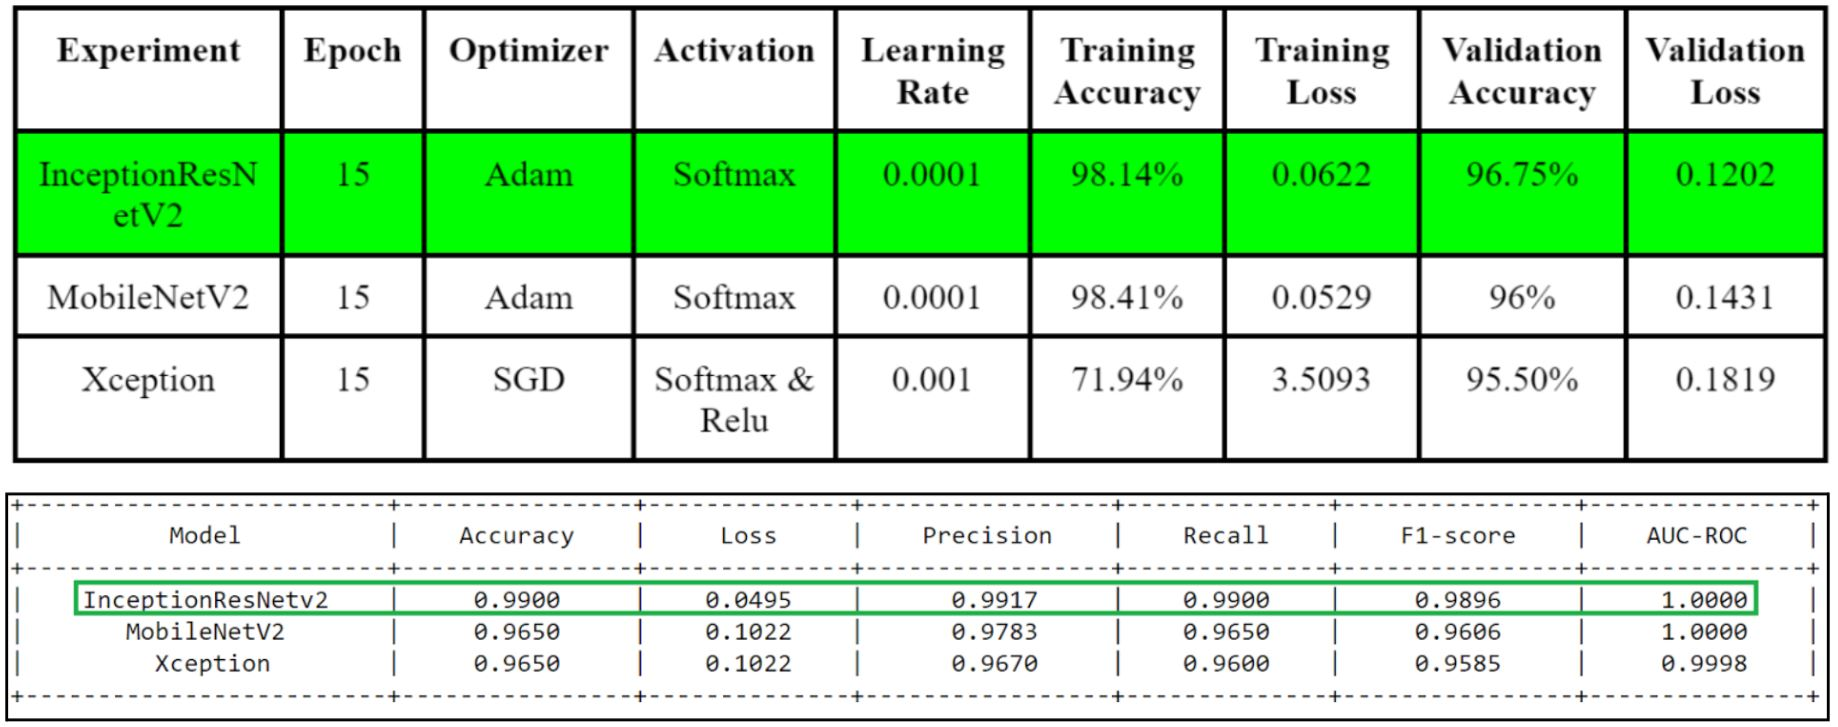

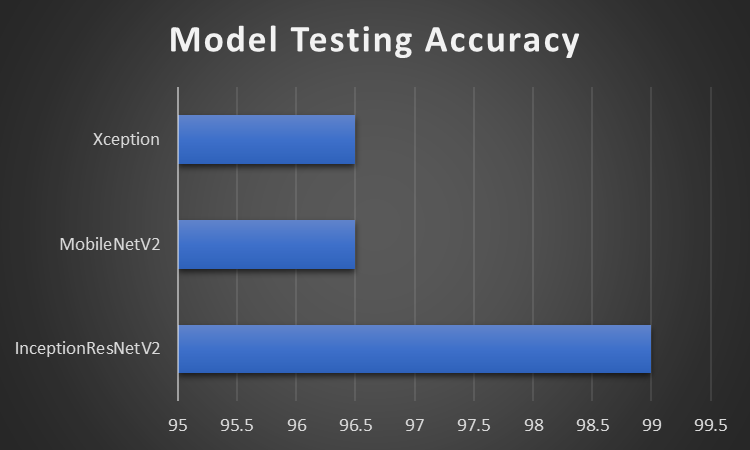

# BIRD SPECIES PREDICTION

In [15]:
def load_and_prep_image(filename, img_shape=224, scale=True):
    
  # Read In The Image 
  img = tf.io.read_file(filename)

  # Decode Image Into Tensor
  img = tf.io.decode_image(img, channels=3)

  # Resizing The Image
  img = tf.image.resize(img, [img_shape, img_shape])

  # scale? Yes/No
  if scale:
    return img/255. # Scale pixel values between 0-1
  else:
    return img      # Pixel values remain between 0-255

In [16]:
def get_pred_and_correct(filename, model, class_names):
    
    # Load and preprocess the image
    img = load_and_prep_image(filename)
    
    # Make prediction
    pred = model.predict(tf.expand_dims(img, axis=0), verbose=0)
    
    # Get the predicted class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
        
    # Get the actual class name
    actual_class = os.path.basename(os.path.dirname(filename))
    
     # Check if prediction is correct
    is_correct = pred_class == actual_class
    return pred_class, is_correct

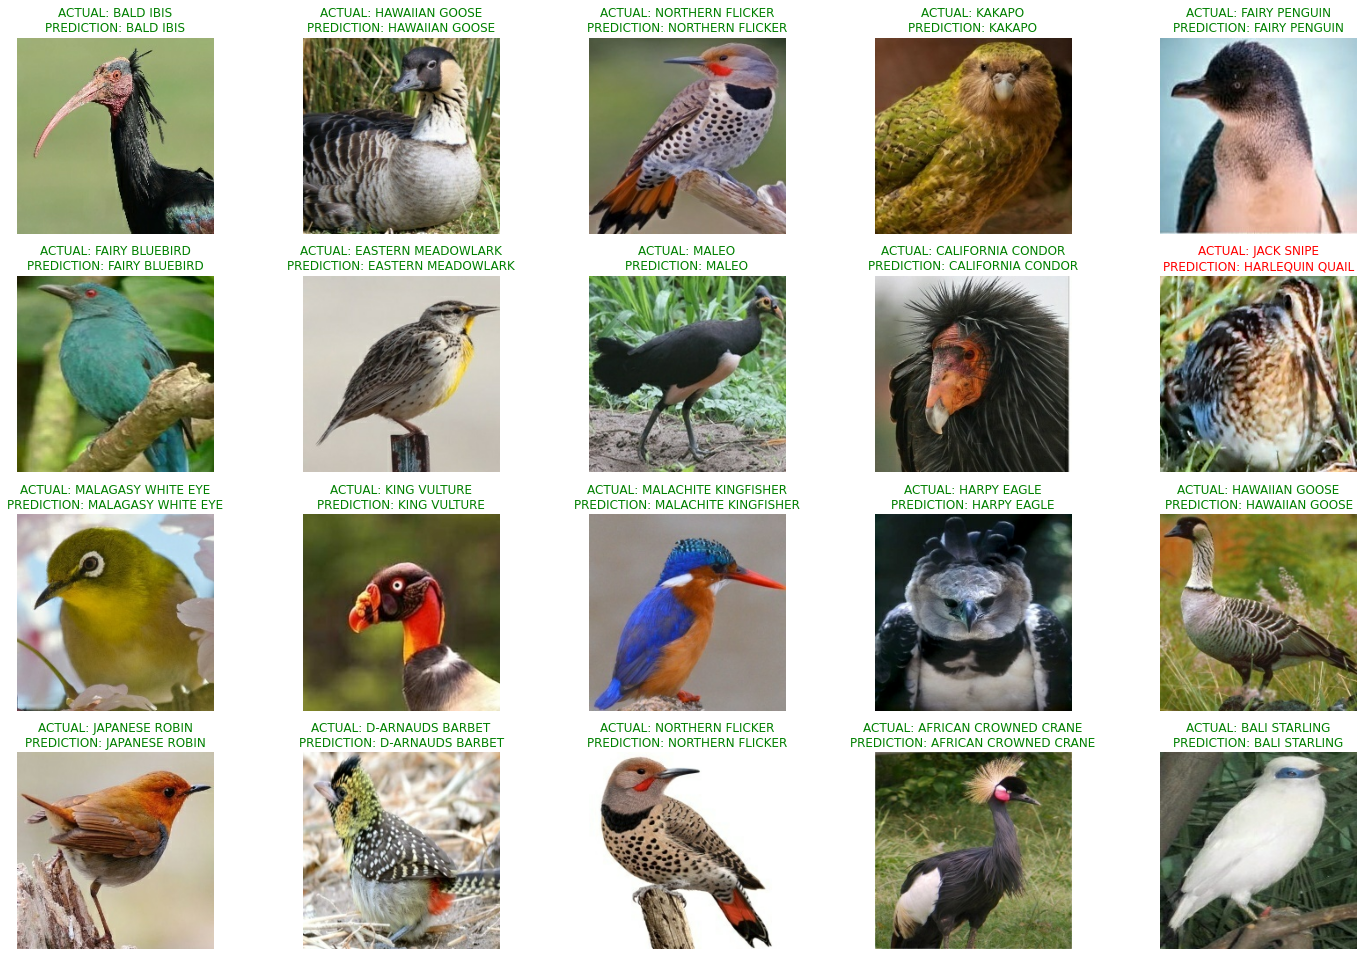

In [26]:
import random
import os

# Choose 20 random images
random_images = []
for i in range(20):
    random_class = random.choice(class_names)
    random_img = random.choice(os.listdir(f'test/{random_class}/'))
    random_images.append((random_class, random_img))

# Plot the images and their predictions
plt.figure(figsize=(20, 20))
for i, (random_class, random_img) in enumerate(random_images):
    plt.subplot(6, 5, i+1)
    
    # Get the actual class and predicted class for the current image
    actual_class = random_class  
    pred_class, is_correct = get_pred_and_correct(f'test/{random_class}/{random_img}', pred_model2, class_names)
    
    # Set the color of the title based on whether the prediction is correct or not
    if is_correct:
        color = 'green'
    else:
        color = 'red'
    
    # Set the title of the subplot with the actual and predicted classes
    title = f'ACTUAL: {actual_class}\nPREDICTION: {pred_class}'
    
    # Show the image and its title in the subplot
    plt.imshow(load_and_prep_image(f'test/{random_class}/{random_img}'))
    plt.title(title, color=color)
    plt.axis(False)
    
plt.tight_layout()
plt.show()

# DEPLOYMENT

In [20]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from IPython.display import display
from ipywidgets import FileUpload, Button, Output, VBox, Label, GridBox, Layout

In [18]:
pred_model2 = tf.keras.models.load_model('my_model_IRNv2.h5')

In [21]:
# Define the function to predict bird species
def predict_bird(image_path):
    try:
        # Open the image file and resize it to 224x224 pixels
        img = Image.open(image_path)
        img = img.resize((224, 224))

        # Convert the image to a numpy array and preprocess it
        img_array = np.expand_dims(np.array(img), axis=0)
        img_preprocessed = preprocess_input(img_array)

        # Make a prediction using the pre-trained model
        prediction = pred_model2.predict(img_preprocessed)

        # Get the index of the predicted class and look up the corresponding bird name
        predicted_class = np.argmax(prediction)
        predicted_name = class_names[predicted_class]

        # Return the prediction as a numpy array
        return prediction, predicted_name
    
    except Exception as e:
        print(f"Error predicting bird species: {str(e)}")
        return None, None

In [22]:
# Define the function to handle file uploads
def on_upload_button_clicked(b):
    with output:
        output.clear_output()
        for name, file_info in uploader.value.items():
            with open(name, 'wb') as f:
                f.write(file_info['content'])
            with output:
                try:
                    # Display the uploaded image
                    display(Image.open(name))

                    # Make a prediction
                    prediction, predicted_name = predict_bird(name)

                    # Display the predicted bird species
                    if predicted_name:
                        prediction_label.value = f"Prediction: {predicted_name}"
                    else:
                        prediction_label.value = "Error predicting bird species."

                except Exception as e:
                    print(f"Error handling uploaded file: {str(e)}")

In [23]:
# Create the file uploader widget and button
uploader = FileUpload()
upload_button = Button(description='Predict Bird Species')
upload_button.on_click(on_upload_button_clicked)

# Create the output widget to display the image and prediction
output = Output()

# Create a label to display the prediction
prediction_label = Label()

# Create a VBox to hold the widgets
box = VBox([uploader, upload_button, output, prediction_label])

# Display the VBox
display(box)